<a href="https://colab.research.google.com/github/nav0203/Advanced-Statistics-project---Comprehensive-Data-Analysis/blob/main/Indian_Credit_Risk_Model_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Indian Credit Risk Model Project**

In [ ]:
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Store the csv file path in a variable
path = "/content/drive/My Drive/Company(FRA).csv"

In [ ]:
df=pd.read_csv(path)

In [ ]:
df

Num  Networth Next Year  Total assets  Net worth  Total income  \
0        1               395.3         827.6      336.5         534.1   
1        2                36.2          67.7       24.3         137.9   
2        3                84.0         238.4       78.9         331.2   
3        4              2041.4        6883.5     1443.3        8448.5   
4        5                41.8          90.9       47.0         388.6   
...    ...                 ...           ...        ...           ...   
4251  4252                 0.2           0.4        0.2           NaN   
4252  4253                93.3         159.6       86.7         172.9   
4253  4254               932.2         833.8      664.6        2314.7   
4254  4255                64.6          95.0       48.5         110.5   
4255  4256                 0.0         384.6      111.3         345.8   

      Change in stock  Total expenses  Profit after tax  PBDITA    PBT  ...  \
0                13.5           508.7              38.9   124.4   64.6  ...   
1                -3.7           131.0               3.2     5.5    1.0  ...   
2               -18.1           309.2               3.9    25.8   10.5  ...   
3               212.2          8482.4             178.3   418.4  185.1  ...   
4                 3.4           392.7              -0.7     7.2   -0.6  ...   
...               ...             ...               ...     ...    ...  ...   
4251              NaN             NaN               NaN     NaN    NaN  ...   
4252              0.1           169.7               3.3    18.4    3.7  ...   
4253             32.1          2151.6             195.2   348.4  303.0  ...   
4254              4.6           113.5               1.6     9.7    2.6  ...   
4255             11.3           341.7              15.4    57.6   20.7  ...   

      Debtors turnover  Finished goods turnover  WIP turnover  \
0                 5.65                     3.99          3.37   
1                  NaN                      NaN           NaN   
2                 2.51                    17.67          8.76   
3                 1.91                    18.14         18.62   
4                68.00                    45.87         28.67   
...                ...                      ...           ...   
4251              0.00                      NaN           NaN   
4252              1.80                    11.00          8.28   
4253              6.08                    59.28         31.14   
4254              3.71                    78.99         11.51   
4255              4.71                    53.37          8.33   

      Raw material turnover  Shares outstanding  Equity face value    EPS  \
0                     14.87           8760056.0               10.0   4.44   
1                       NaN                 NaN                NaN   0.00   
2                      8.35                 NaN                NaN   0.00   
3                     11.11          10000000.0               10.0  17.60   
4                     19.93            107315.0              100.0  -6.52   
...                     ...                 ...                ...    ...   
4251                   0.00                 NaN                NaN   0.00   
4252                   9.88           8162700.0               10.0   0.42   
4253                   9.87           7479762.0               10.0  26.58   
4254                  14.95                 NaN                NaN   0.00   
4255                   3.74            960000.0               10.0  15.63   

      Adjusted EPS  Total liabilities  PE on BSE  
0             4.44              827.6        NaN  
1             0.00               67.7        NaN  
2             0.00              238.4        NaN  
3            17.60             6883.5        NaN  
4            -6.52               90.9        NaN  
...            ...                ...        ...  
4251          0.00                0.4        NaN  
4252          0.42              159.6      16.81  
4253         26.

## **Outlier treatment**

In [ ]:
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df < lower_bound) | (df > upper_bound)
    return outliers

outliers = detect_outliers_iqr(df)

print("Outliers using IQR method:")
print(outliers)

Outliers using IQR method:
        Num  Networth Next Year  Total assets  Net worth  Total income  \
0     False               False         False      False         False   
1     False               False         False      False         False   
2     False               False         False      False         False   
3     False                True          True       True          True   
4     False               False         False      False         False   
...     ...                 ...           ...        ...           ...   
4251  False               False         False      False         False   
4252  False               False         False      False         False   
4253  False                True         False      False         False   
4254  False               False         False      False         False   
4255  False               False         False      False         False   

      Change in stock  Total expenses  Profit after tax  PBDITA    PBT  ...  \
0    

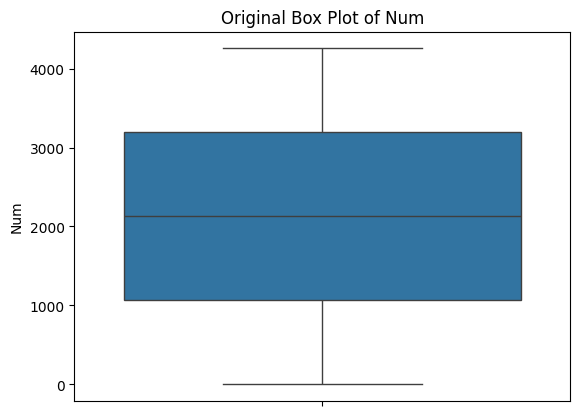

Threshold value for removing outliers in Num : 6383.5


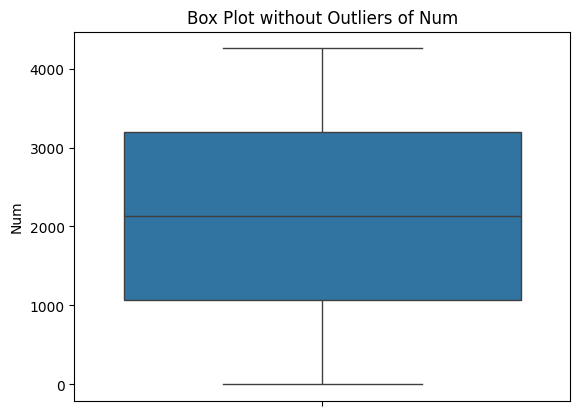

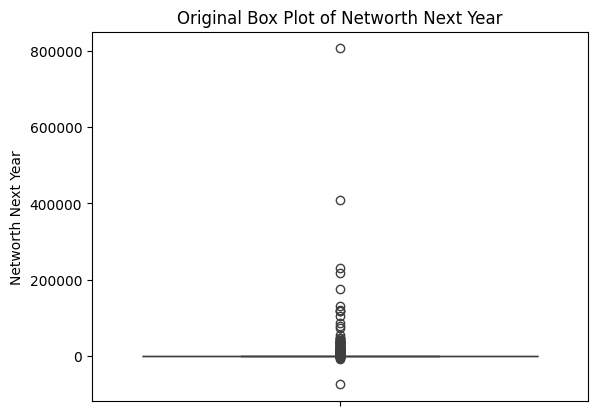

Threshold value for removing outliers in Networth Next Year : 821.0999999999999


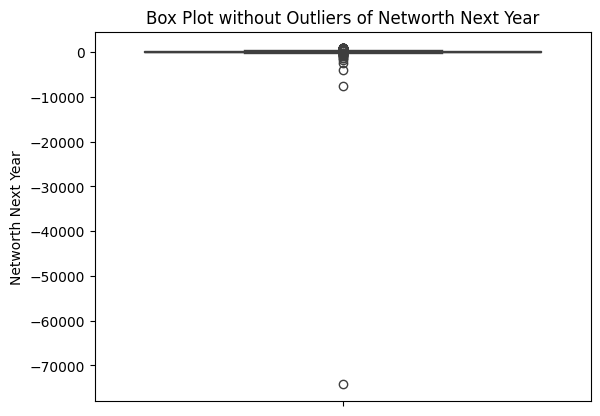

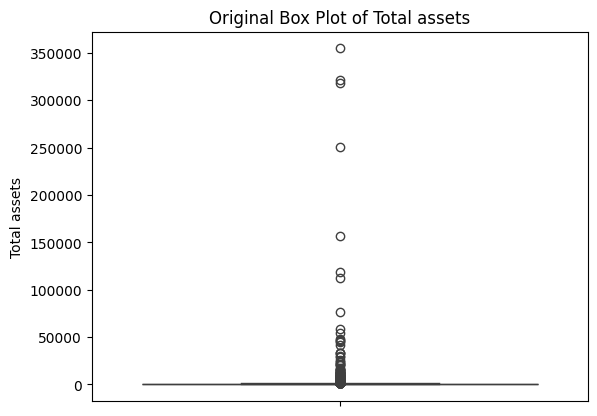

Threshold value for removing outliers in Total assets : 1456.0124999999998


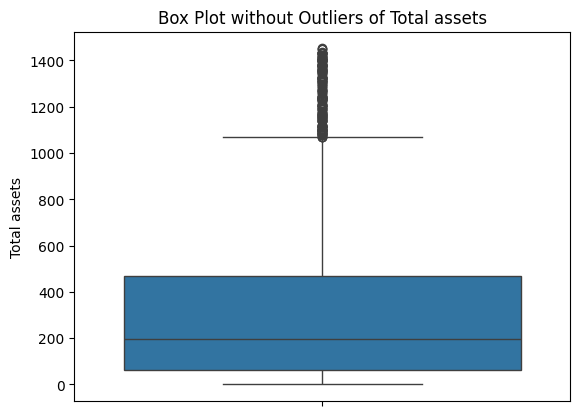

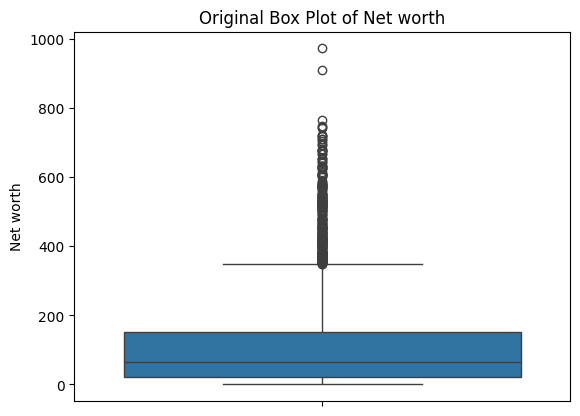

Threshold value for removing outliers in Net worth : 348.38750000000005


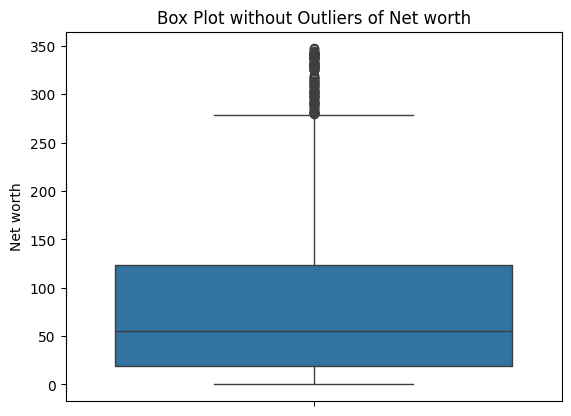

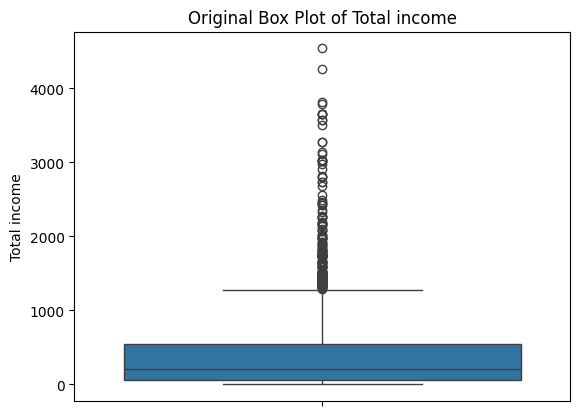

Threshold value for removing outliers in Total income : 1281.05


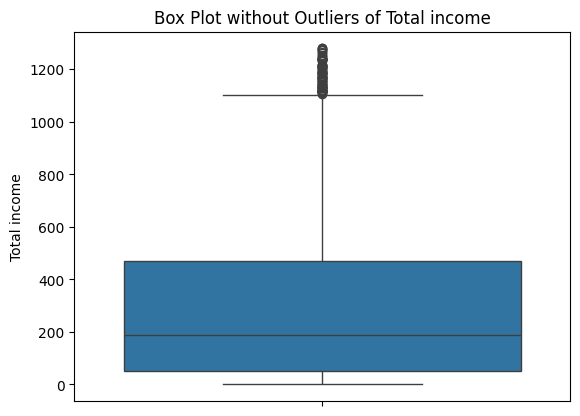

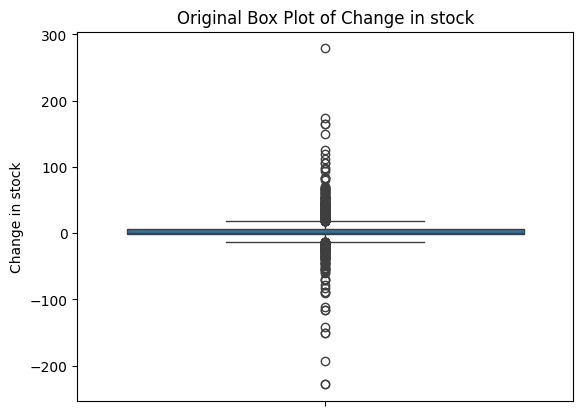

Threshold value for removing outliers in Change in stock : 18.55


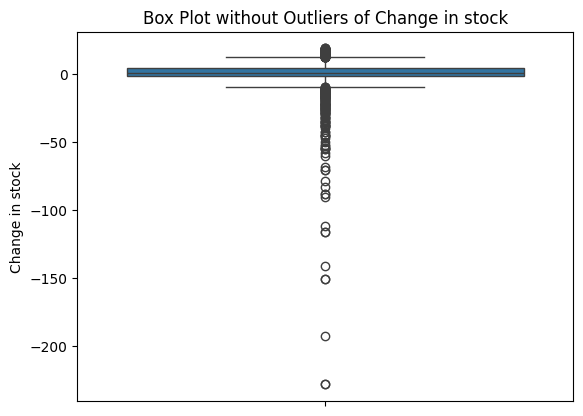

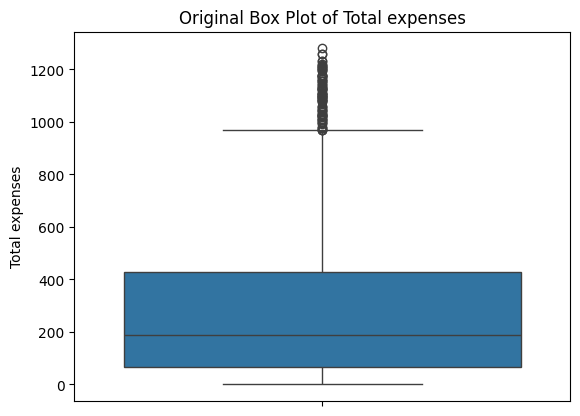

Threshold value for removing outliers in Total expenses : 968.0


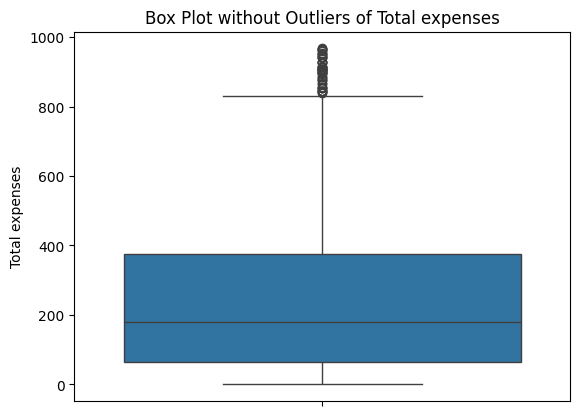

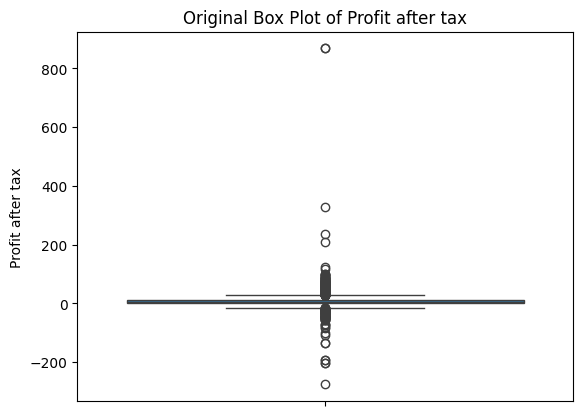

Threshold value for removing outliers in Profit after tax : 27.887500000000003


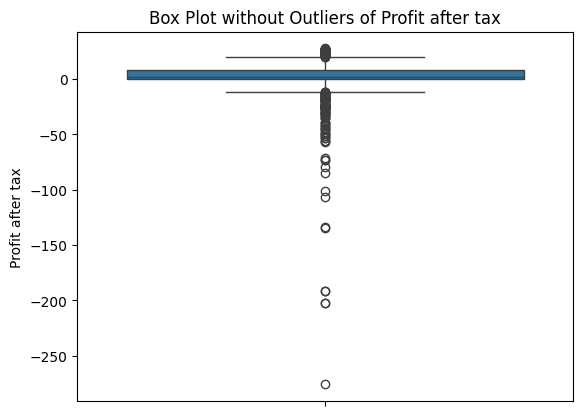

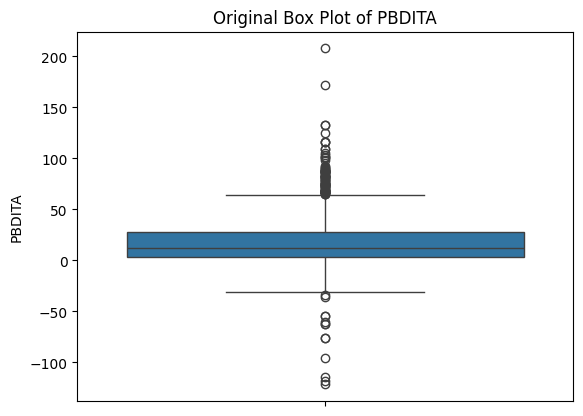

Threshold value for removing outliers in PBDITA : 64.9


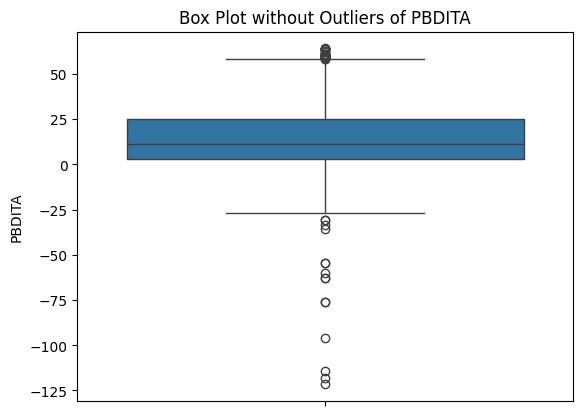

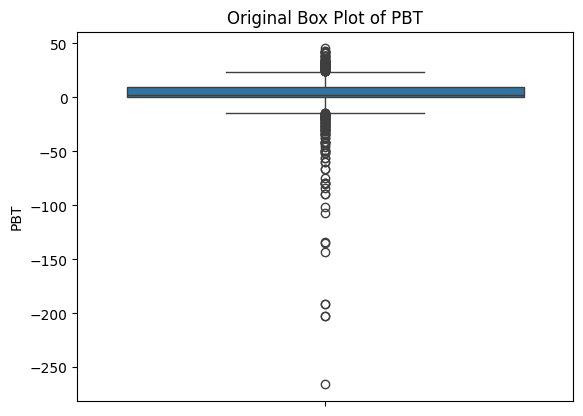

Threshold value for removing outliers in PBT : 24.099999999999998


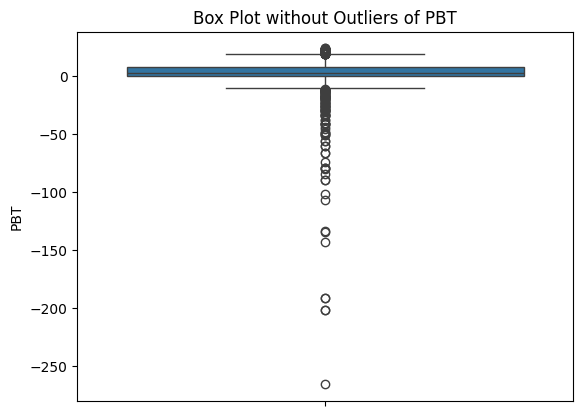

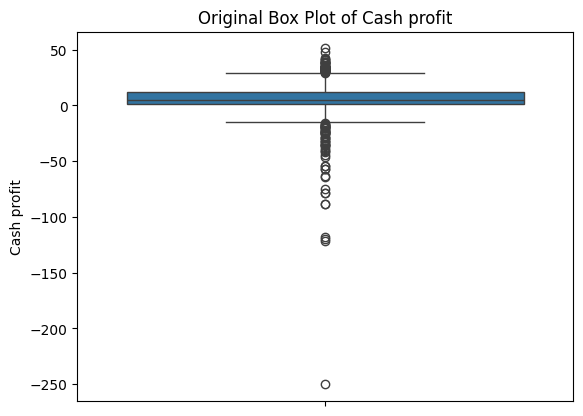

Threshold value for removing outliers in Cash profit : 29.250000000000004


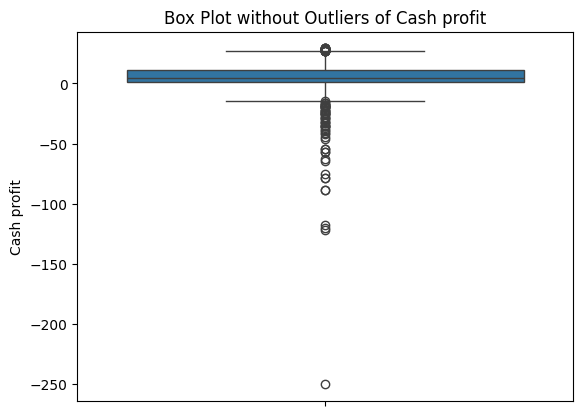

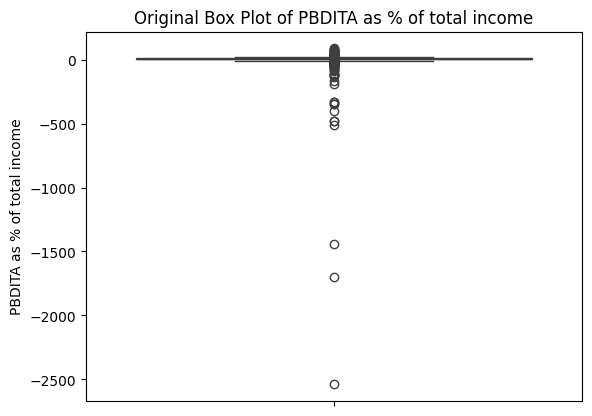

Threshold value for removing outliers in PBDITA as % of total income : 24.82


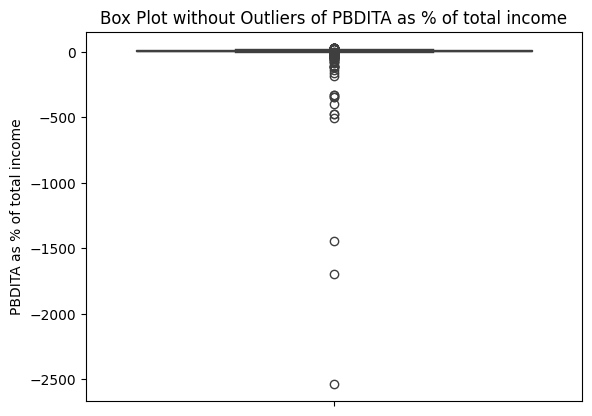

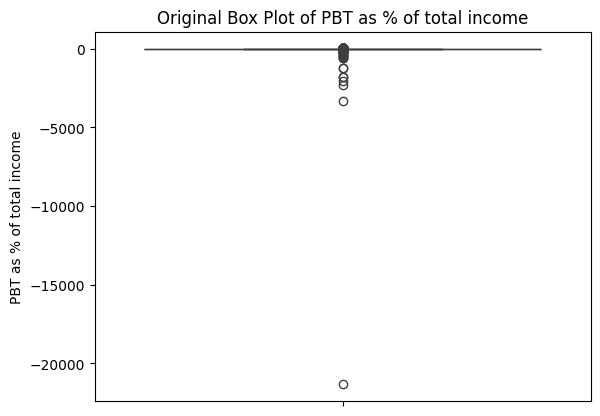

Threshold value for removing outliers in PBT as % of total income : 9.20625


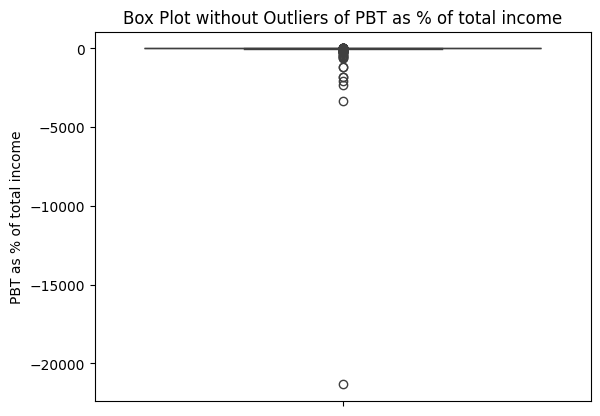

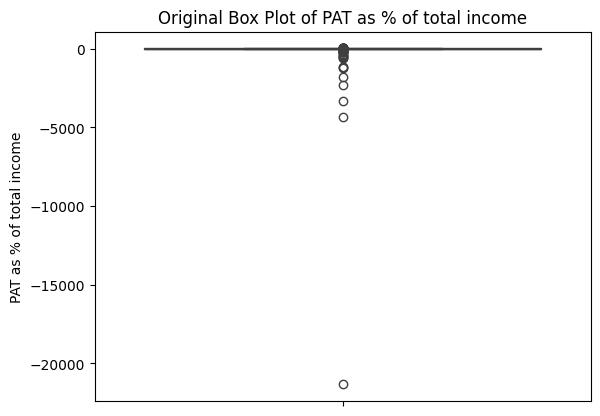

Threshold value for removing outliers in PAT as % of total income : 6.220000000000001


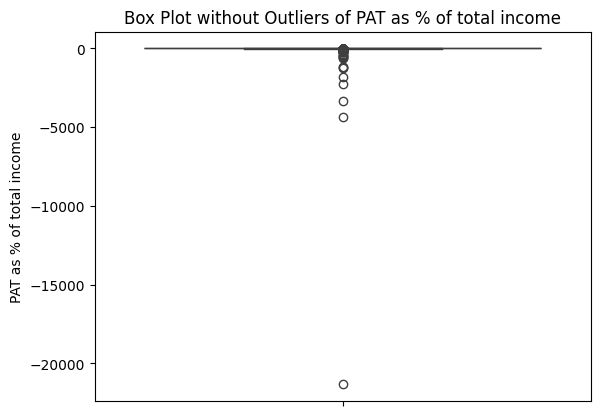

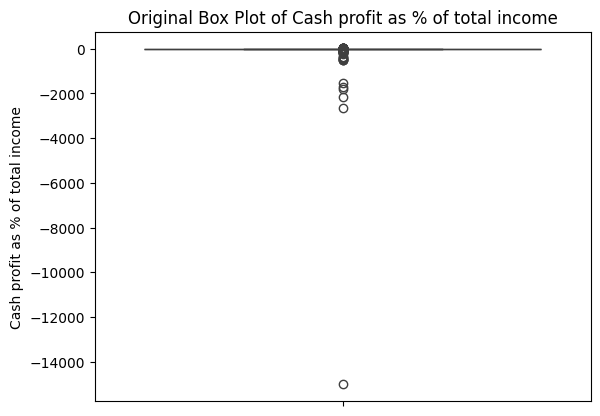

Threshold value for removing outliers in Cash profit as % of total income : 12.365000000000002


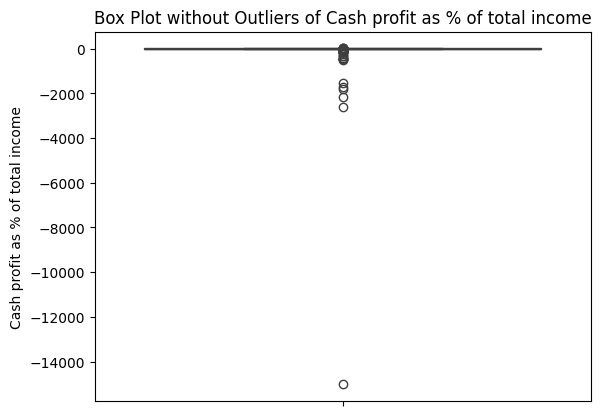

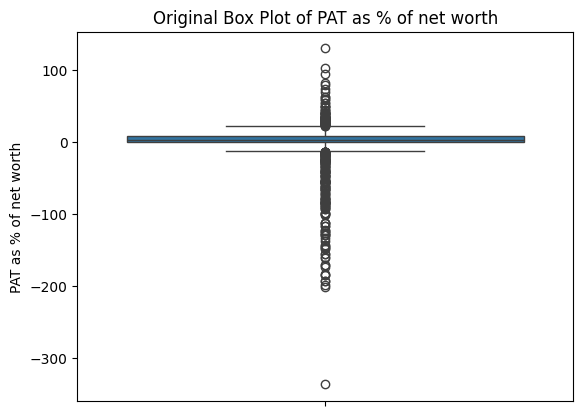

Threshold value for removing outliers in PAT as % of net worth : 21.565


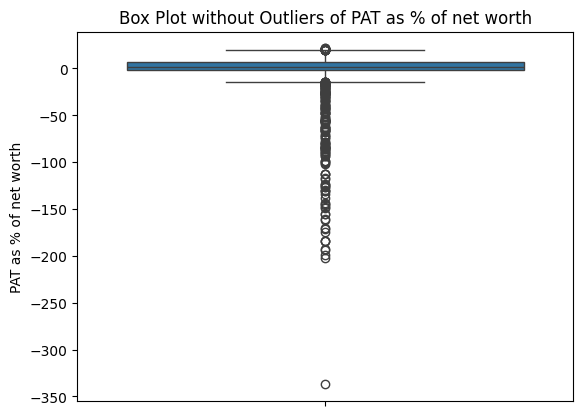

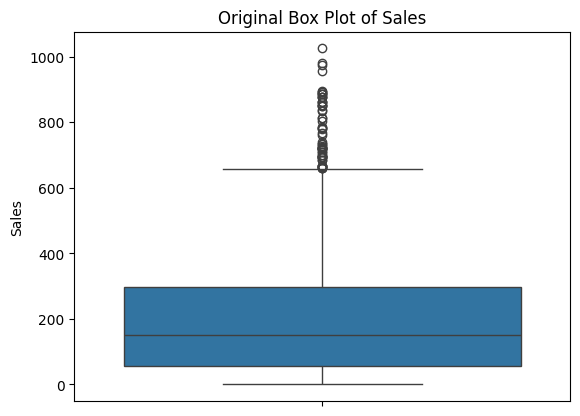

Threshold value for removing outliers in Sales : 657.25


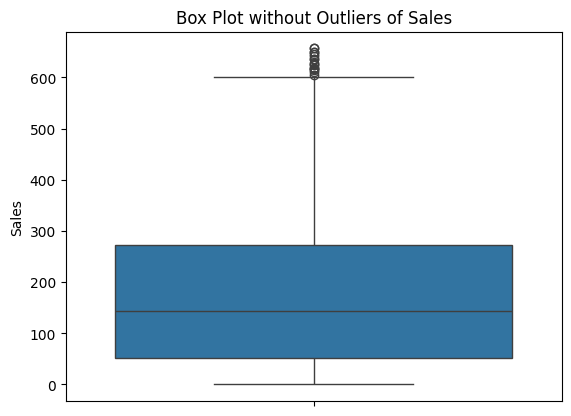

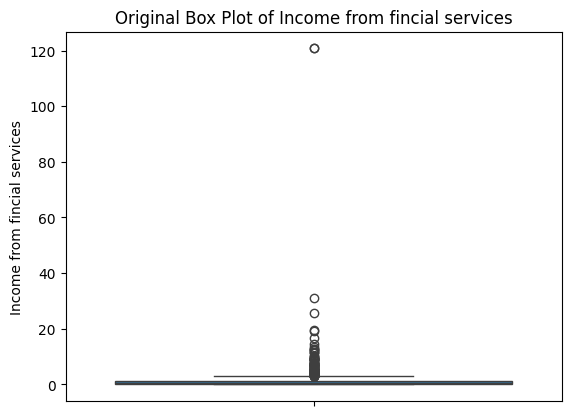

Threshold value for removing outliers in Income from fincial services : 2.95


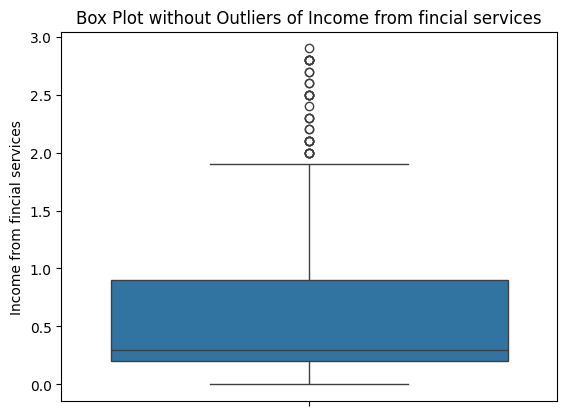

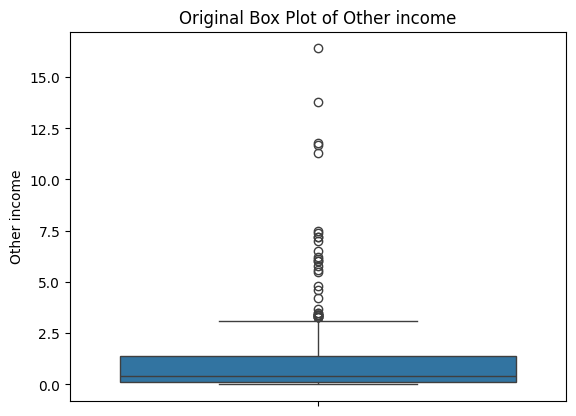

Threshold value for removing outliers in Other income : 3.2874999999999996


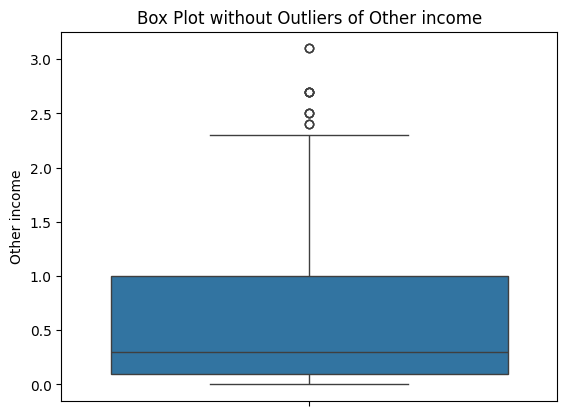

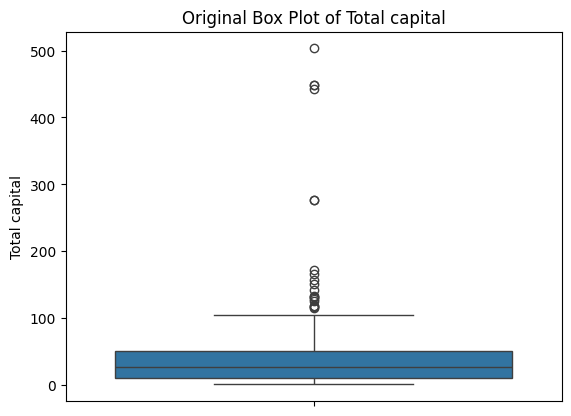

Threshold value for removing outliers in Total capital : 108.94999999999999


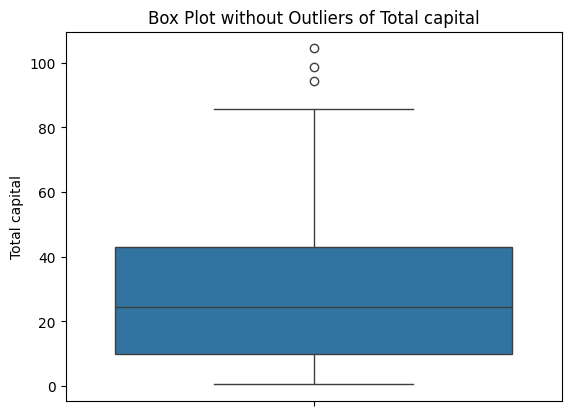

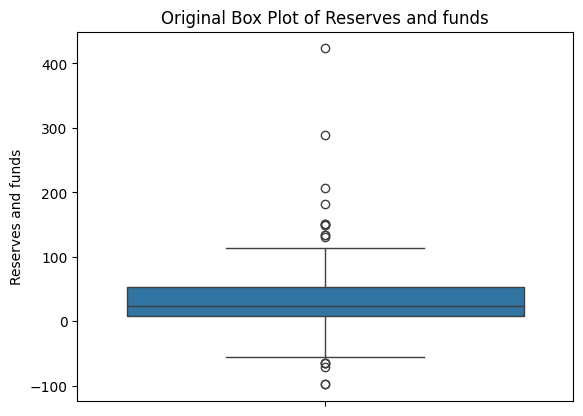

Threshold value for removing outliers in Reserves and funds : 123.05000000000001


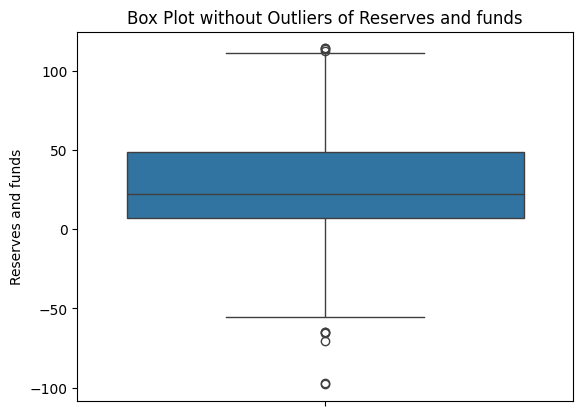

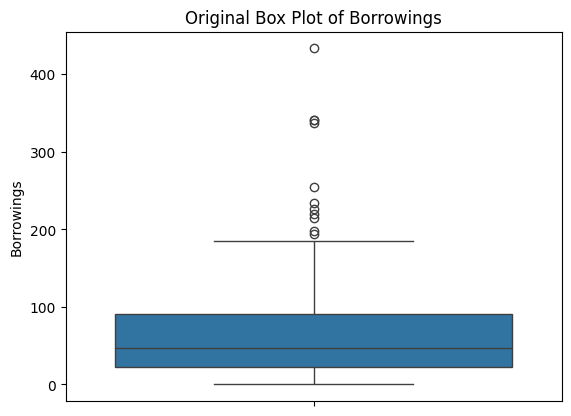

Threshold value for removing outliers in Borrowings : 193.35000000000002


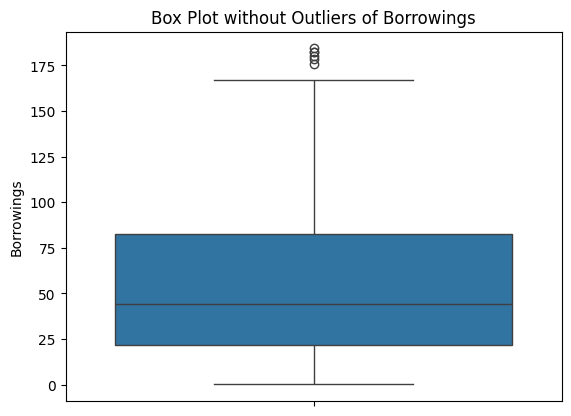

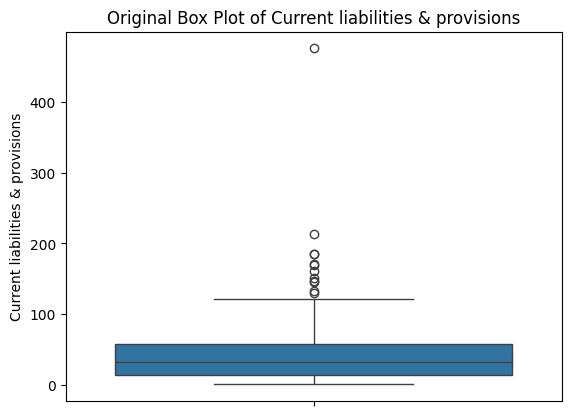

Threshold value for removing outliers in Current liabilities & provisions : 125.0375


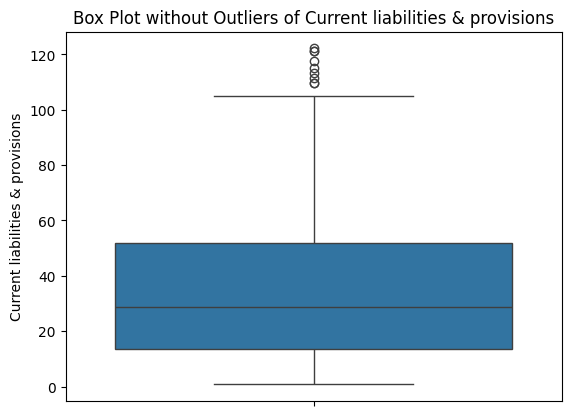

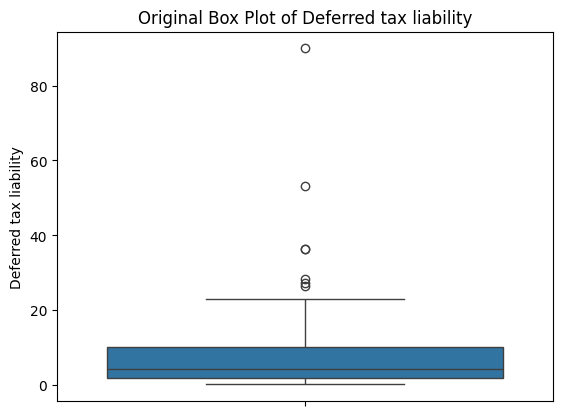

Threshold value for removing outliers in Deferred tax liability : 22.95


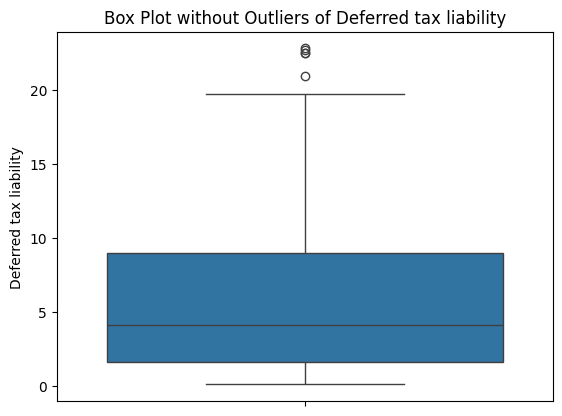

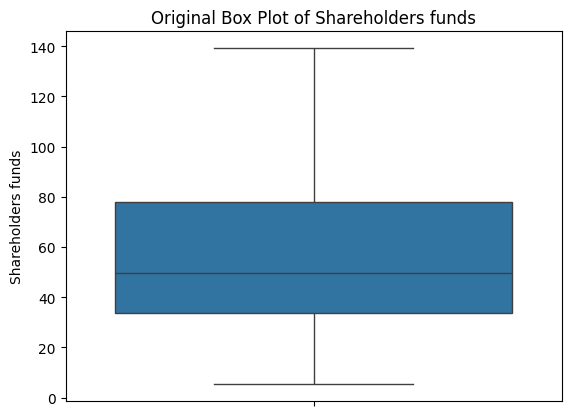

Threshold value for removing outliers in Shareholders funds : 144.525


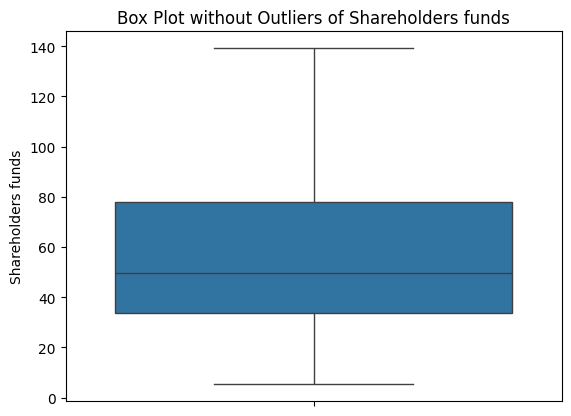

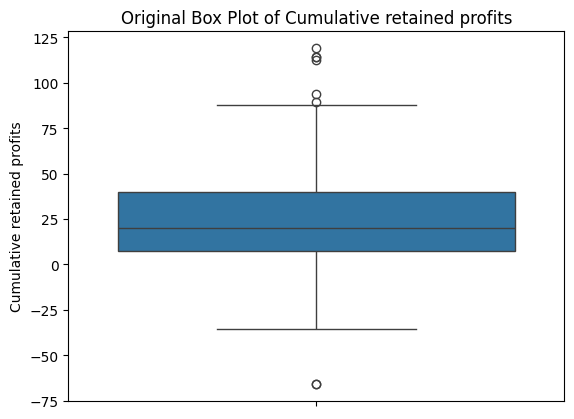

Threshold value for removing outliers in Cumulative retained profits : 88.05000000000001


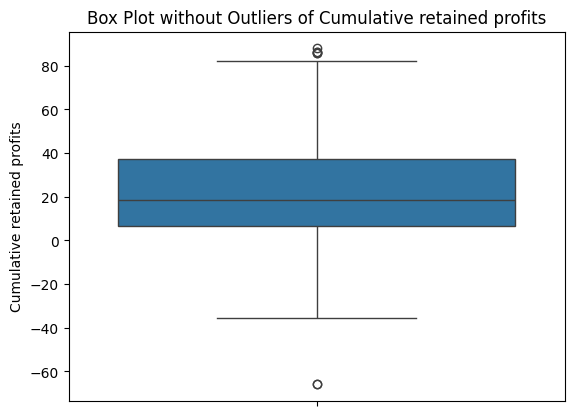

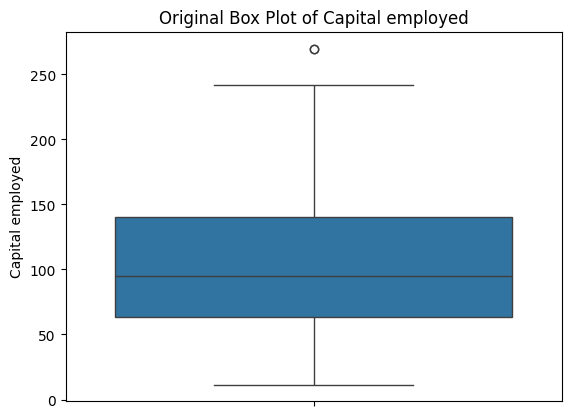

Threshold value for removing outliers in Capital employed : 255.58749999999998


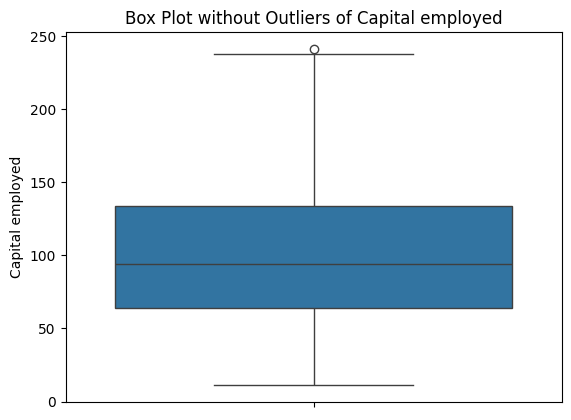

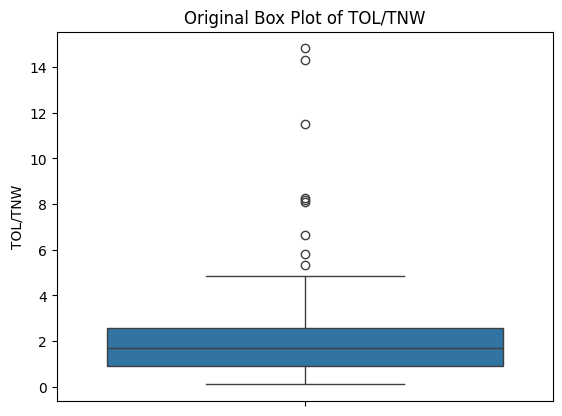

Threshold value for removing outliers in TOL/TNW : 5.10375


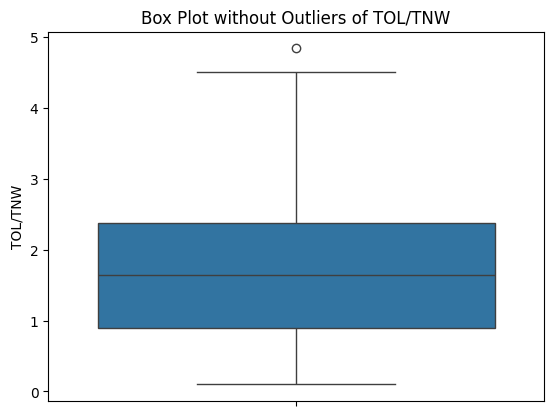

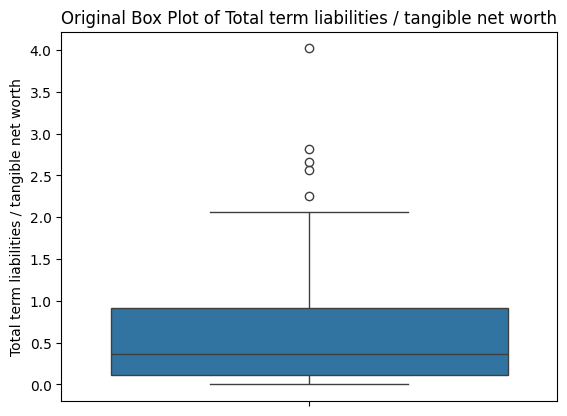

Threshold value for removing outliers in Total term liabilities / tangible net worth : 2.1100000000000003


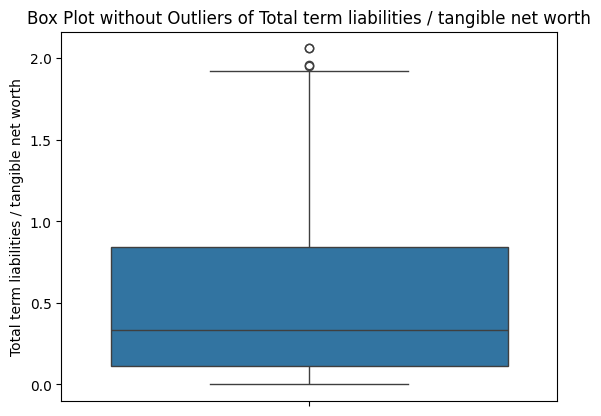

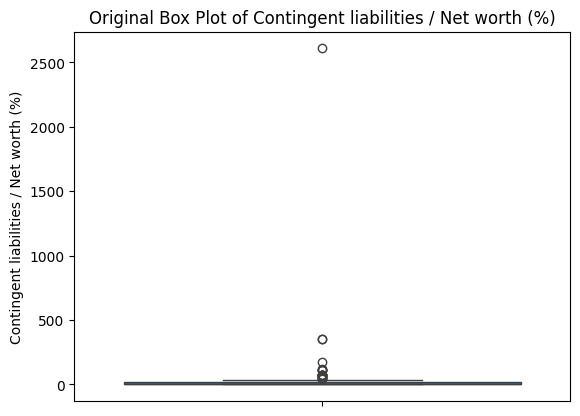

Threshold value for removing outliers in Contingent liabilities / Net worth (%) : 35.9


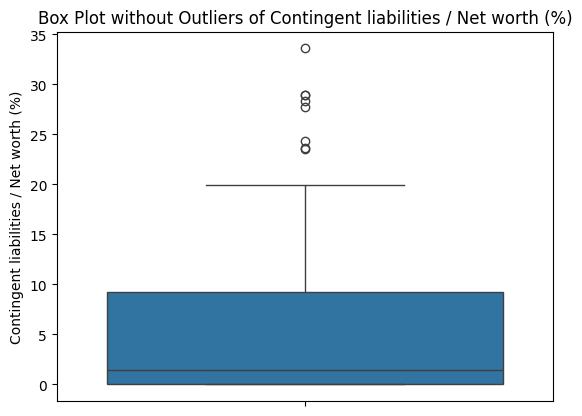

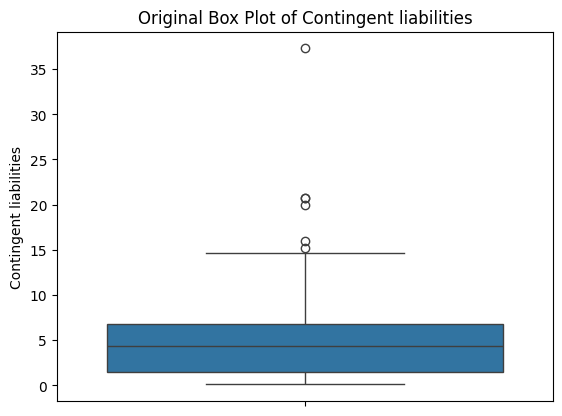

Threshold value for removing outliers in Contingent liabilities : 14.8125


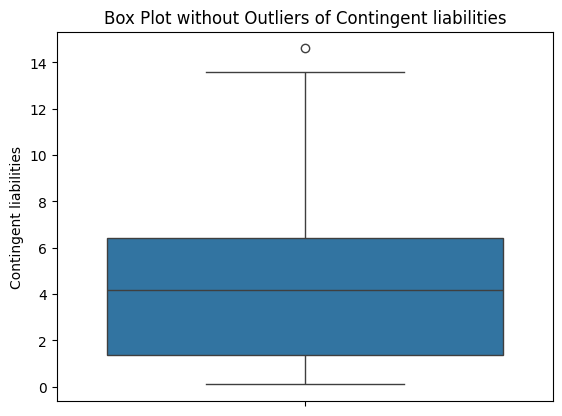

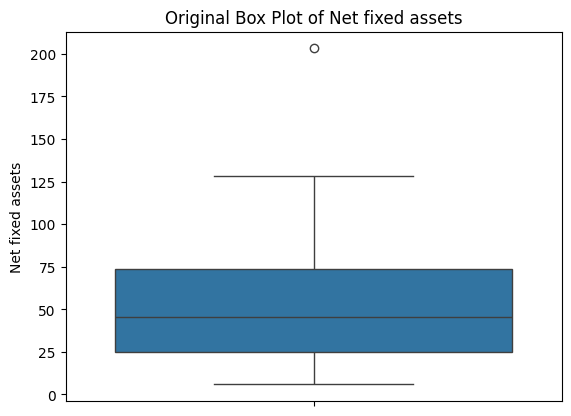

Threshold value for removing outliers in Net fixed assets : 146.1125


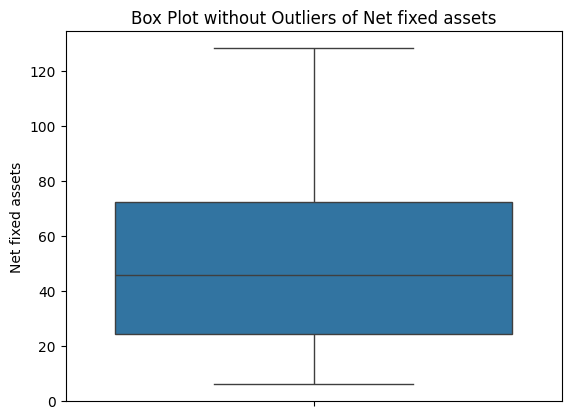

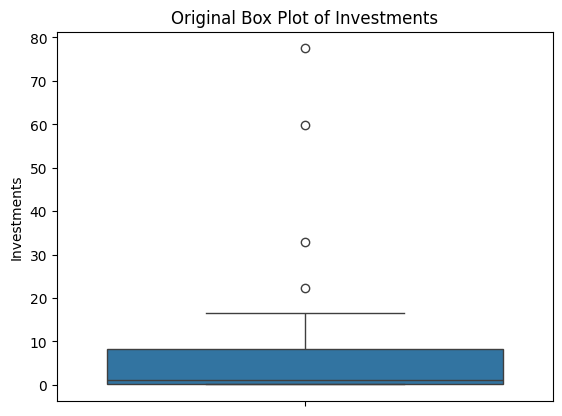

Threshold value for removing outliers in Investments : 20.199999999999996


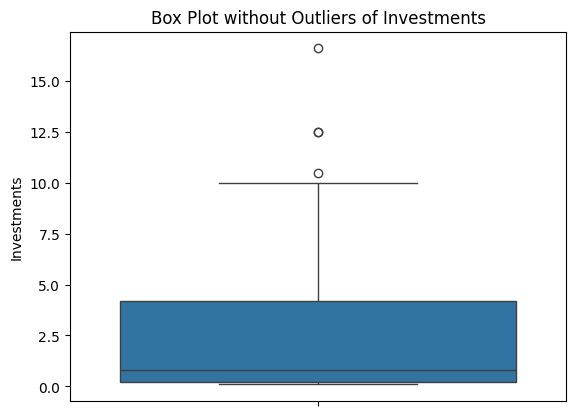

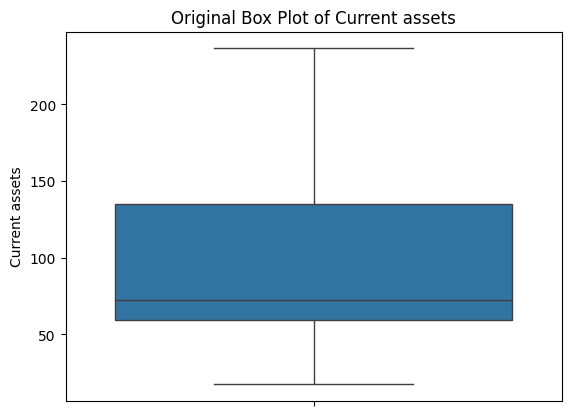

Threshold value for removing outliers in Current assets : 248.10000000000002


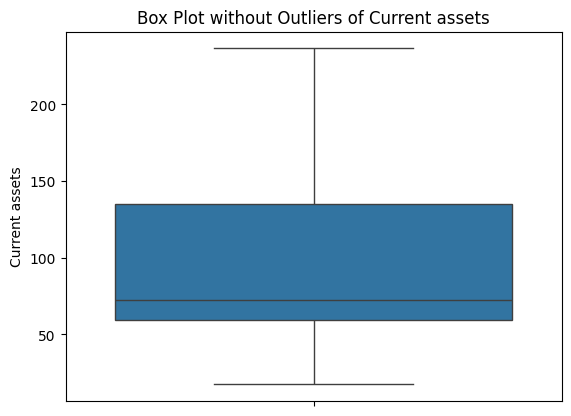

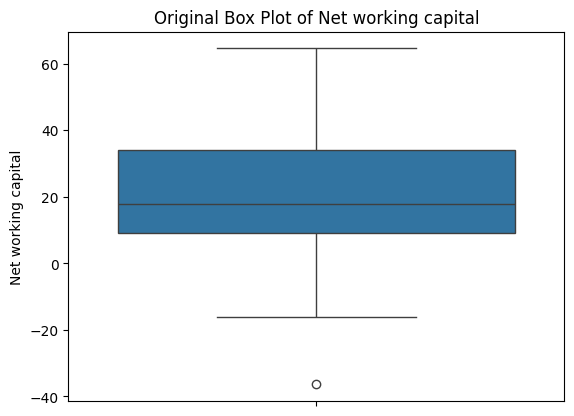

Threshold value for removing outliers in Net working capital : 71.1


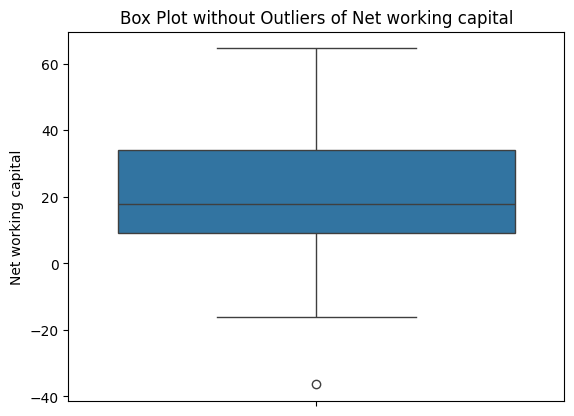

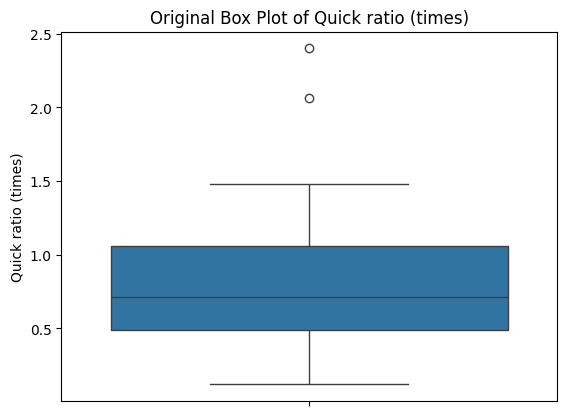

Threshold value for removing outliers in Quick ratio (times) : 1.915


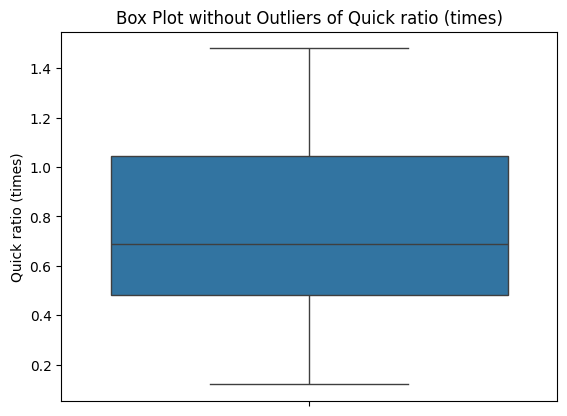

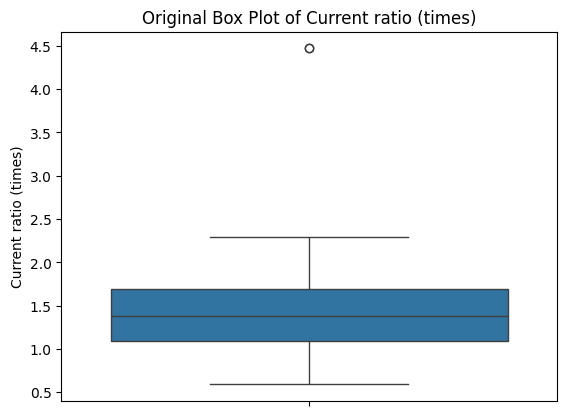

Threshold value for removing outliers in Current ratio (times) : 2.5824999999999996


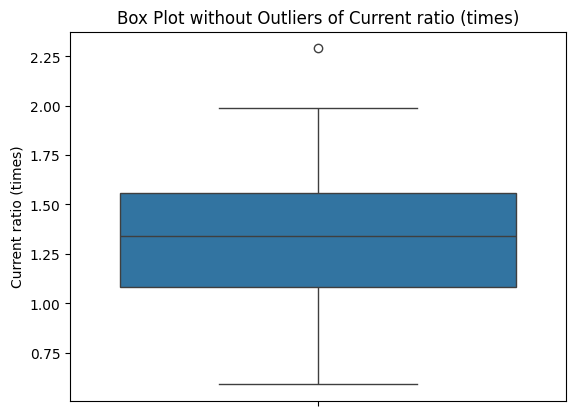

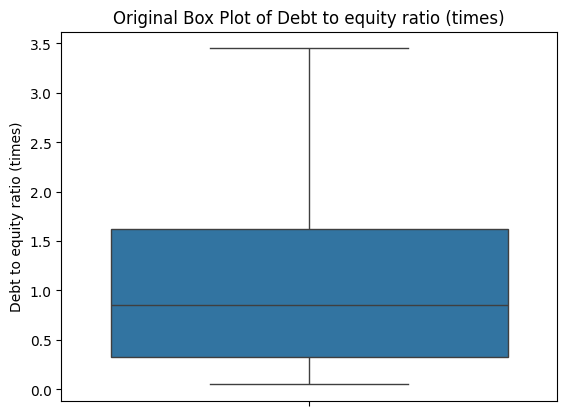

Threshold value for removing outliers in Debt to equity ratio (times) : 3.555


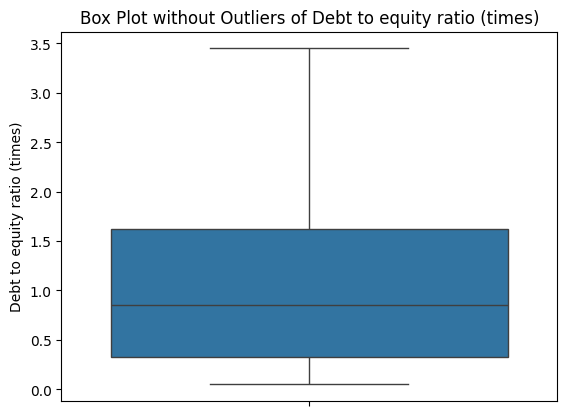

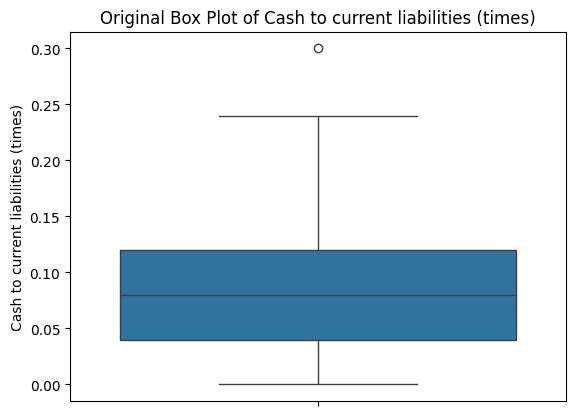

Threshold value for removing outliers in Cash to current liabilities (times) : 0.24


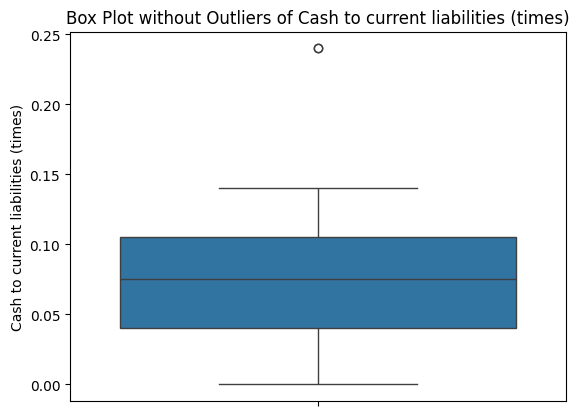

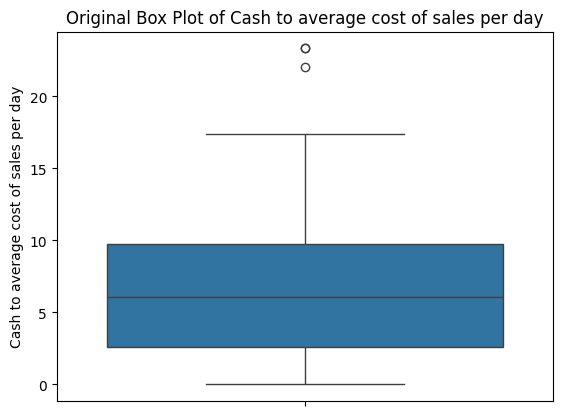

Threshold value for removing outliers in Cash to average cost of sales per day : 20.47


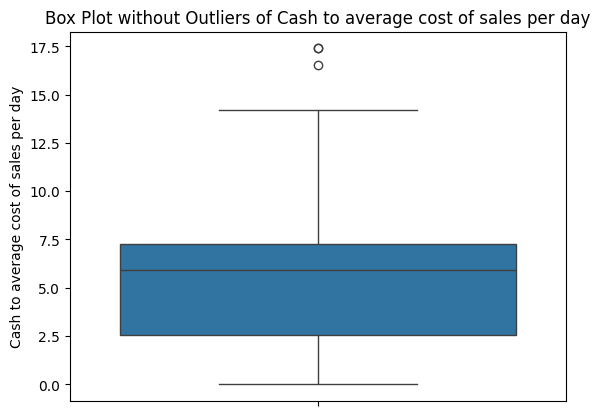

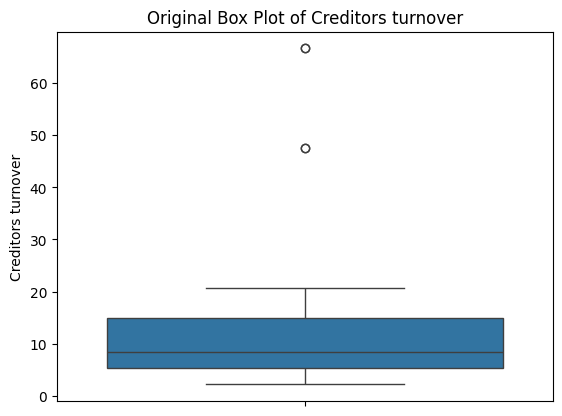

Threshold value for removing outliers in Creditors turnover : 29.075


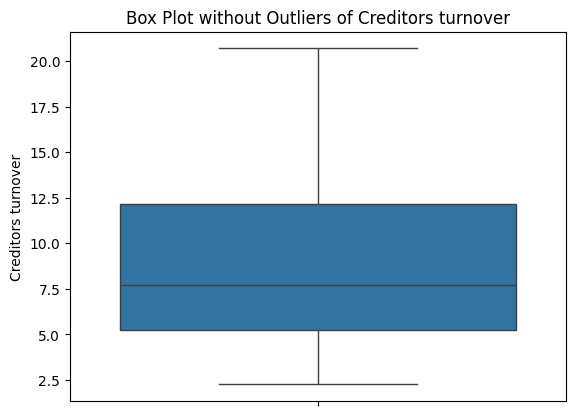

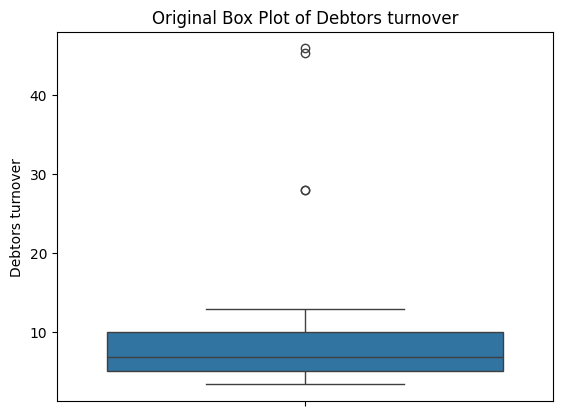

Threshold value for removing outliers in Debtors turnover : 17.54


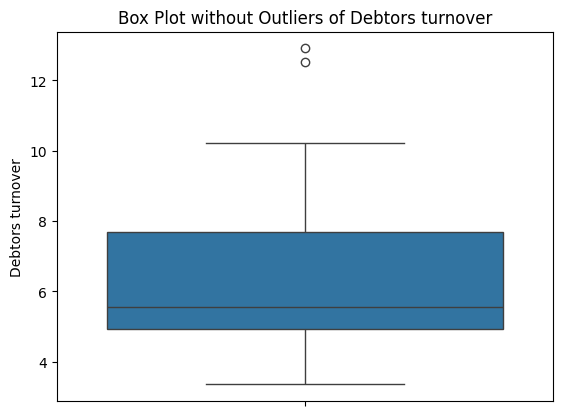

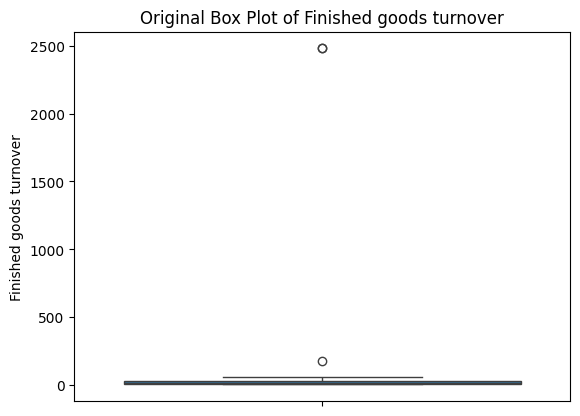

Threshold value for removing outliers in Finished goods turnover : 66.37875


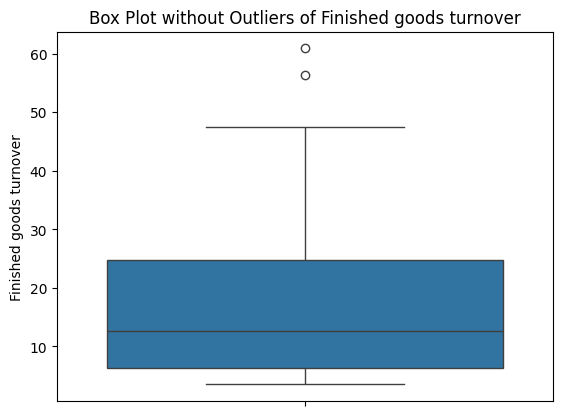

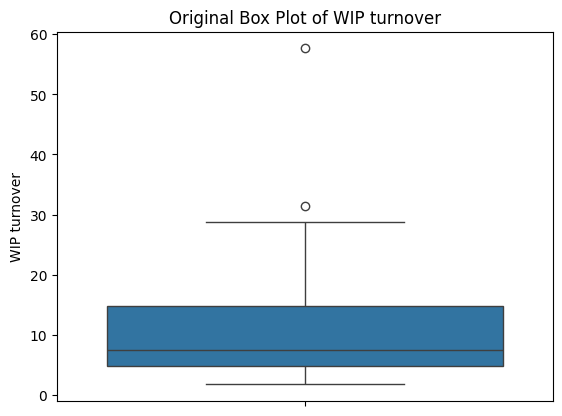

Threshold value for removing outliers in WIP turnover : 29.804999999999996


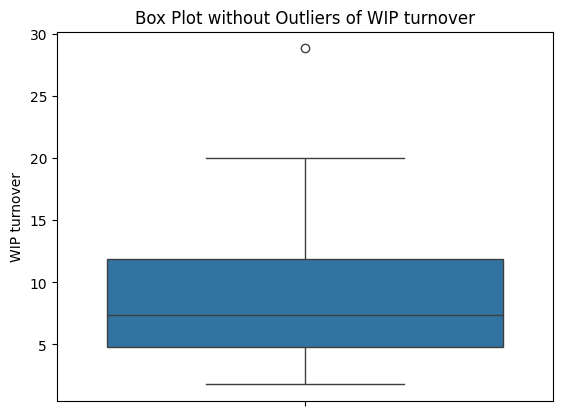

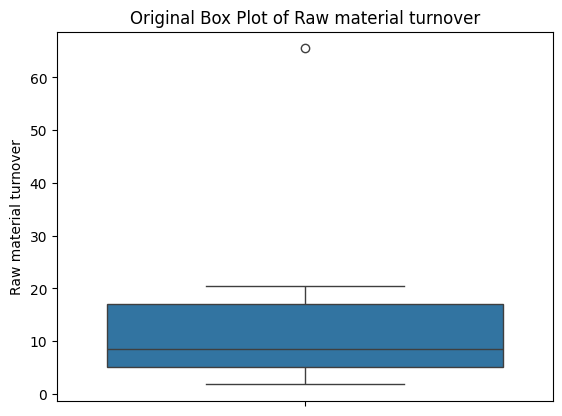

Threshold value for removing outliers in Raw material turnover : 34.95


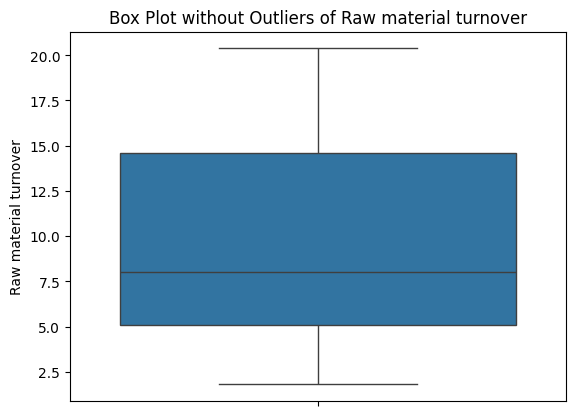

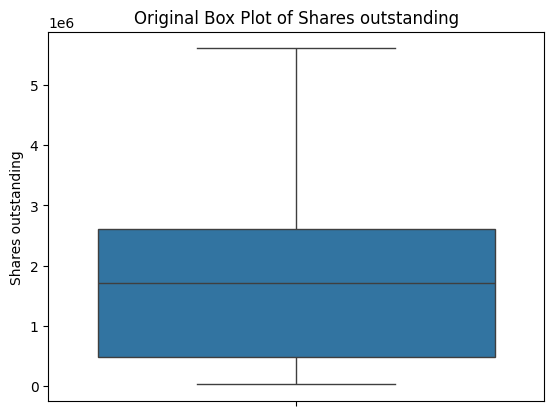

Threshold value for removing outliers in Shares outstanding : 5780000.0


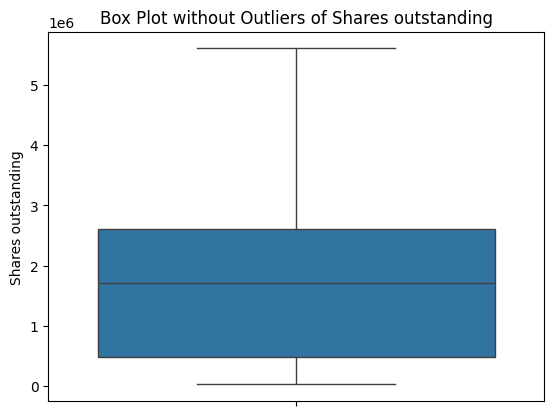

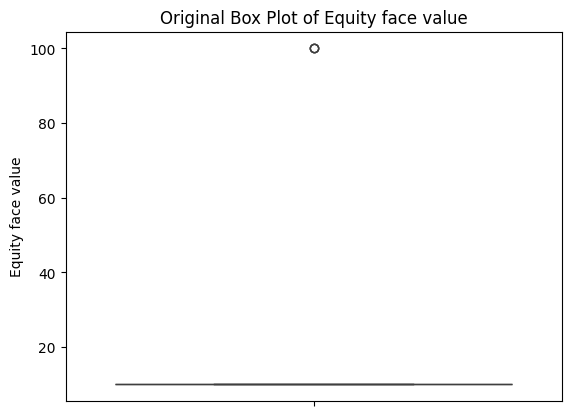

Threshold value for removing outliers in Equity face value : 10.0


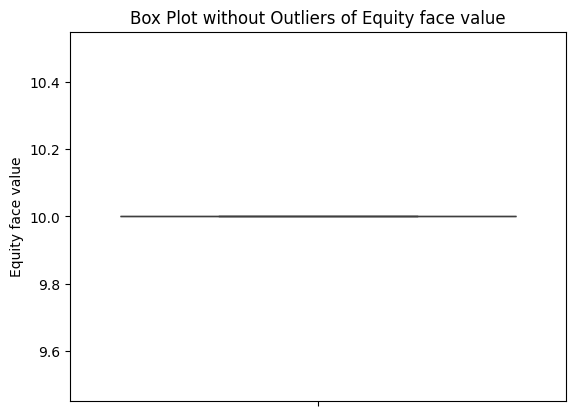

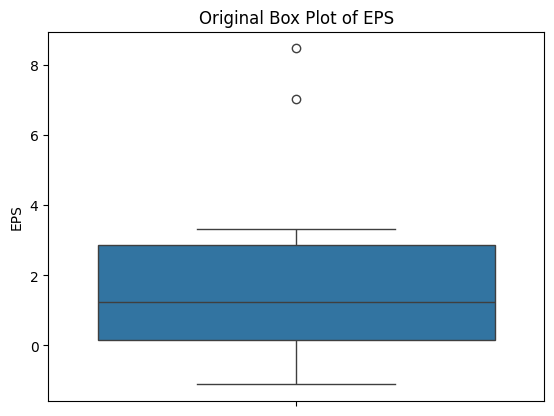

Threshold value for removing outliers in EPS : 6.896249999999999


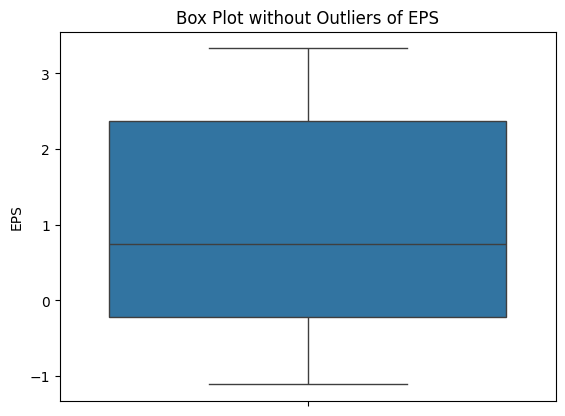

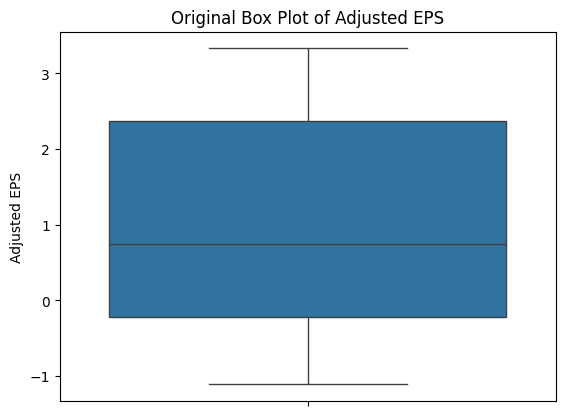

Threshold value for removing outliers in Adjusted EPS : 6.2625


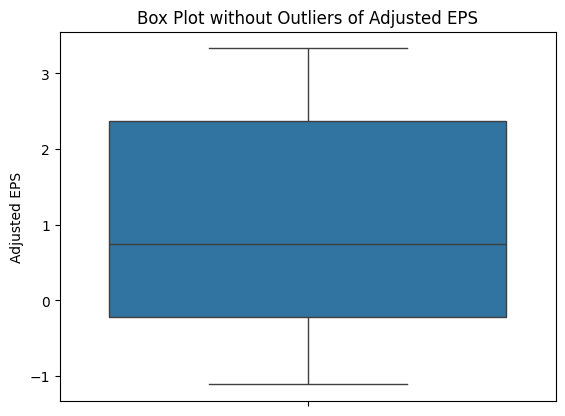

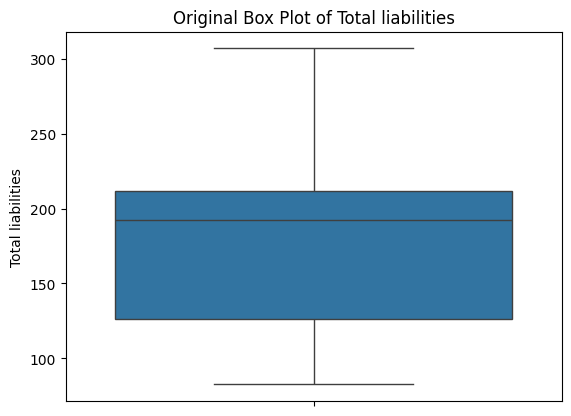

Threshold value for removing outliers in Total liabilities : 339.0875


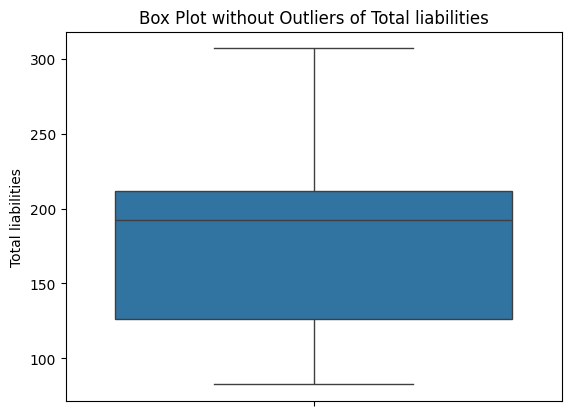

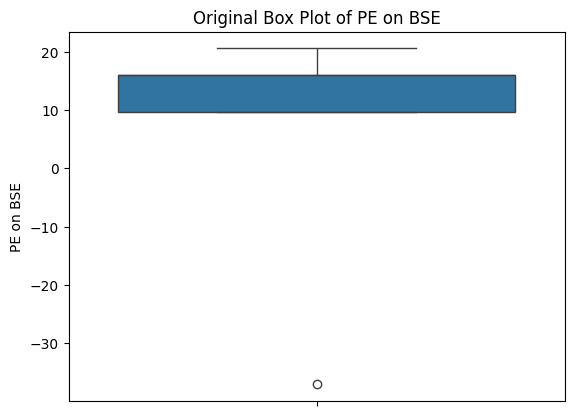

Threshold value for removing outliers in PE on BSE : 25.695


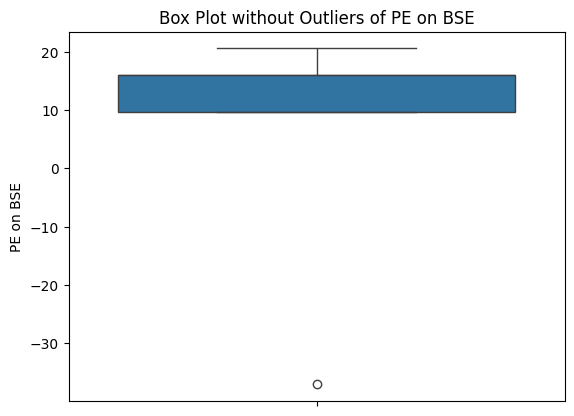

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def removal_box_plot(df, columns):
    for column in columns:
        sns.boxplot(df[column])
        plt.title(f'Original Box Plot of {column}')
        plt.show()

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        threshold_value = Q3 + 1.5 * IQR  # Adjust multiplier as needed
        print("Threshold value for removing outliers in", column, ":", threshold_value)

        removed_outliers = df[df[column] <= threshold_value]

        sns.boxplot(removed_outliers[column])
        plt.title(f'Box Plot without Outliers of {column}')
        plt.show()

        df = removed_outliers  # Update DataFrame after removing outliers from each column

    return removed_outliers

# Specify the list of columns from which you want to remove outliers
columns_to_remove_outliers = ['Num', 'Networth Next Year', 'Total assets', 'Net worth',
       'Total income', 'Change in stock', 'Total expenses', 'Profit after tax',
       'PBDITA', 'PBT', 'Cash profit', 'PBDITA as % of total income',
       'PBT as % of total income', 'PAT as % of total income',
       'Cash profit as % of total income', 'PAT as % of net worth', 'Sales',
       'Income from fincial services', 'Other income', 'Total capital',
       'Reserves and funds', 'Borrowings', 'Current liabilities & provisions',
       'Deferred tax liability', 'Shareholders funds',
       'Cumulative retained profits', 'Capital employed', 'TOL/TNW',
       'Total term liabilities / tangible net worth',
       'Contingent liabilities / Net worth (%)', 'Contingent liabilities',
       'Net fixed assets', 'Investments', 'Current assets',
       'Net working capital', 'Quick ratio (times)', 'Current ratio (times)',
       'Debt to equity ratio (times)', 'Cash to current liabilities (times)',
       'Cash to average cost of sales per day', 'Creditors turnover',
       'Debtors turnover', 'Finished goods turnover', 'WIP turnover',
       'Raw material turnover', 'Shares outstanding', 'Equity face value',
       'EPS', 'Adjusted EPS', 'Total liabilities', 'PE on BSE']


no_outliers = removal_box_plot(df, columns_to_remove_outliers)

In [ ]:
df.columns

Index(['Num', 'Networth Next Year', 'Total assets', 'Net worth',
       'Total income', 'Change in stock', 'Total expenses', 'Profit after tax',
       'PBDITA', 'PBT', 'Cash profit', 'PBDITA as % of total income',
       'PBT as % of total income', 'PAT as % of total income',
       'Cash profit as % of total income', 'PAT as % of net worth', 'Sales',
       'Income from fincial services', 'Other income', 'Total capital',
       'Reserves and funds', 'Borrowings', 'Current liabilities & provisions',
       'Deferred tax liability', 'Shareholders funds',
       'Cumulative retained profits', 'Capital employed', 'TOL/TNW',
       'Total term liabilities / tangible net worth',
       'Contingent liabilities / Net worth (%)', 'Contingent liabilities',
       'Net fixed assets', 'Investments', 'Current assets',
       'Net working capital', 'Quick ratio (times)', 'Current ratio (times)',
       'Debt to equity ratio (times)', 'Cash to current liabilities (times)',
       'Cash to average c

In [ ]:
no_outliers

Num  Networth Next Year  Total assets  Net worth  Total income  \
508    509               172.8         307.0      125.4         490.8   
667    668                 0.0         307.0      125.4         490.8   
2894  2895                62.2          86.6       51.0          78.7   
3389  3390               108.3         148.7       86.3         268.1   
3976  3977                48.6          82.6       47.3         106.3   

      Change in stock  Total expenses  Profit after tax  PBDITA   PBT  ...  \
508              -3.1           485.4               2.3    18.0   3.5  ...   
667              -3.1           485.4               2.3    18.0   3.5  ...   
2894              1.8            84.9              -4.4     0.9  -5.8  ...   
3389             -0.2           254.6              13.3    27.5  20.5  ...   
3976              0.6           105.2               1.7     6.9   2.5  ...   

      Debtors turnover  Finished goods turnover  WIP turnover  \
508              10.22                     5.81          5.02   
667              10.22                     5.81          5.02   
2894              6.82                    12.61          7.48   
3389              5.07                    15.87         11.87   
3976              5.16                    28.68         28.82   

      Raw material turnover  Shares outstanding  Equity face value   EPS  \
508                    7.55           3101100.0               10.0  0.74   
667                    7.55           3101100.0               10.0  0.74   
2894                   4.07           2212500.0               10.0 -1.08   
3389                   7.36           5609600.0               10.0  2.37   
3976                   7.06           3969750.0               10.0  0.43   

      Adjusted EPS  Total liabilities  PE on BSE  
508           0.74              307.0      16.02  
667           0.74              307.0      16.02  
2894         -1.08               86.6     -37.06  
3389          2.37              148.7       9.57  
3976          0.43               82.6      20.55  

[5 rows x 51 columns]

## **Missing Value Treatment**

In [ ]:
df.isnull().sum()

Num                                               0
Networth Next Year                                0
Total assets                                      0
Net worth                                         0
Total income                                    231
Change in stock                                 550
Total expenses                                  165
Profit after tax                                154
PBDITA                                          154
PBT                                             154
Cash profit                                     154
PBDITA as % of total income                      79
PBT as % of total income                         79
PAT as % of total income                         79
Cash profit as % of total income                 79
PAT as % of net worth                             0
Sales                                           305
Income from fincial services                   1111
Other income                                   1556
Total capita

In [ ]:
def handle_missing_values(df, missing_counts):
    for col, num_missing in missing_counts.items():
        if num_missing > 0:
            if df[col].dtype in [np.float64, np.int64]:  # Numerical columns
                df[col].fillna(df[col].mean(), inplace=True)
            else:  # Categorical or other columns
                df[col].fillna(0, inplace=True)  # Replace with appropriate constant or method

    return df

# Count missing values in each column
missing_counts = df.isnull().sum()

# Apply missing value treatment
df_cleaned = handle_missing_values(df.copy(), missing_counts)

print("DataFrame after handling missing values:")
print(df_cleaned)

DataFrame after handling missing values:
       Num  Networth Next Year  Total assets  Net worth  Total income  \
0        1               395.3         827.6      336.5    534.100000   
1        2                36.2          67.7       24.3    137.900000   
2        3                84.0         238.4       78.9    331.200000   
3        4              2041.4        6883.5     1443.3   8448.500000   
4        5                41.8          90.9       47.0    388.600000   
...    ...                 ...           ...        ...           ...   
4251  4252                 0.2           0.4        0.2   4688.189789   
4252  4253                93.3         159.6       86.7    172.900000   
4253  4254               932.2         833.8      664.6   2314.700000   
4254  4255                64.6          95.0       48.5    110.500000   
4255  4256                 0.0         384.6      111.3    345.800000   

      Change in stock  Total expenses  Profit after tax      PBDITA  \
0          

## **Check for multicollineraity**

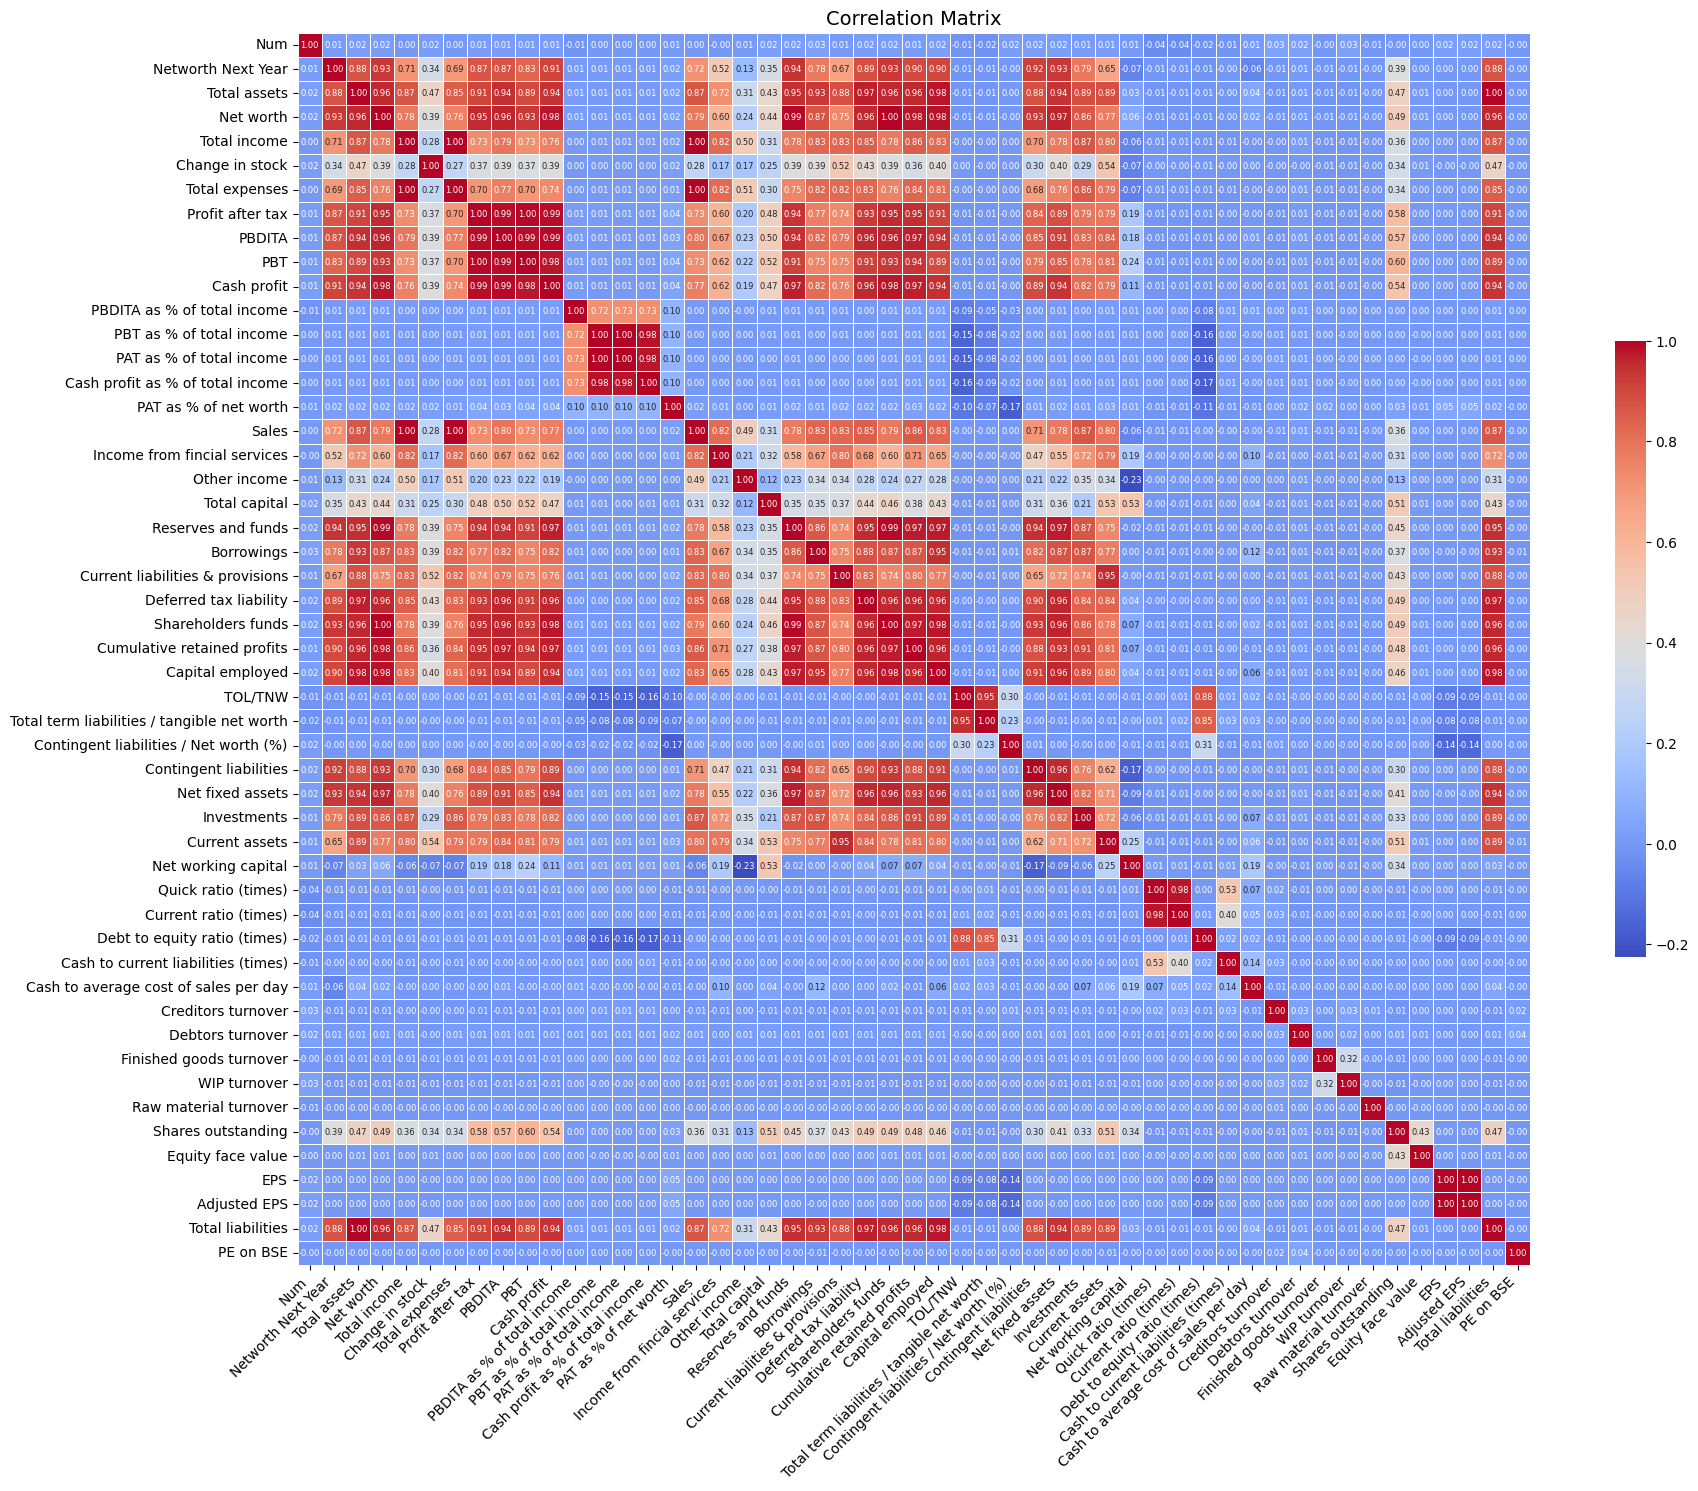

Pairs of variables with high correlation:
Networth Next Year - Total assets: 0.8778028814466854
Networth Next Year - Net worth: 0.9301348253492808
Networth Next Year - Total income: 0.7107786411998145
Networth Next Year - Profit after tax: 0.8678703637004082
Networth Next Year - PBDITA: 0.8722722732474264
Networth Next Year - PBT: 0.8336803675526337
Networth Next Year - Cash profit: 0.9064824019767795
Networth Next Year - Sales: 0.7160391488084142
Networth Next Year - Reserves and funds: 0.9384674849069115
Networth Next Year - Borrowings: 0.7825522817197432
Networth Next Year - Deferred tax liability: 0.889141631078624
Networth Next Year - Shareholders funds: 0.9299031941124895
Networth Next Year - Cumulative retained profits: 0.8974912455482026
Networth Next Year - Capital employed: 0.9012139145129601
Networth Next Year - Contingent liabilities: 0.9173424727963707
Networth Next Year - Net fixed assets: 0.9294045582718462
Networth Next Year - Investments: 0.7854306385733983
Networth Ne

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Replace this with actual data loading method

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Set up the matplotlib figure with larger size
plt.figure(figsize=(22, 16))

# Draw the heatmap without the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5,
            annot_kws={"size": 6}, fmt=".2f", cbar_kws={"shrink": .5})

# Rotate the x and y axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add title to the heatmap
plt.title('Correlation Matrix', fontsize=14)

# Show the plot
plt.show()

# Identify pairs of variables with high correlation (absolute value > 0.7)
threshold = 0.7
high_correlations = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)

# Print pairs of variables with high correlation
print("Pairs of variables with high correlation:")
for col in high_correlations.columns:
    correlated_cols = high_correlations.index[high_correlations[col]]
    for correlated_col in correlated_cols:
        if col != correlated_col:
            print(f"{col} - {correlated_col}: {correlation_matrix.loc[col, correlated_col]}")


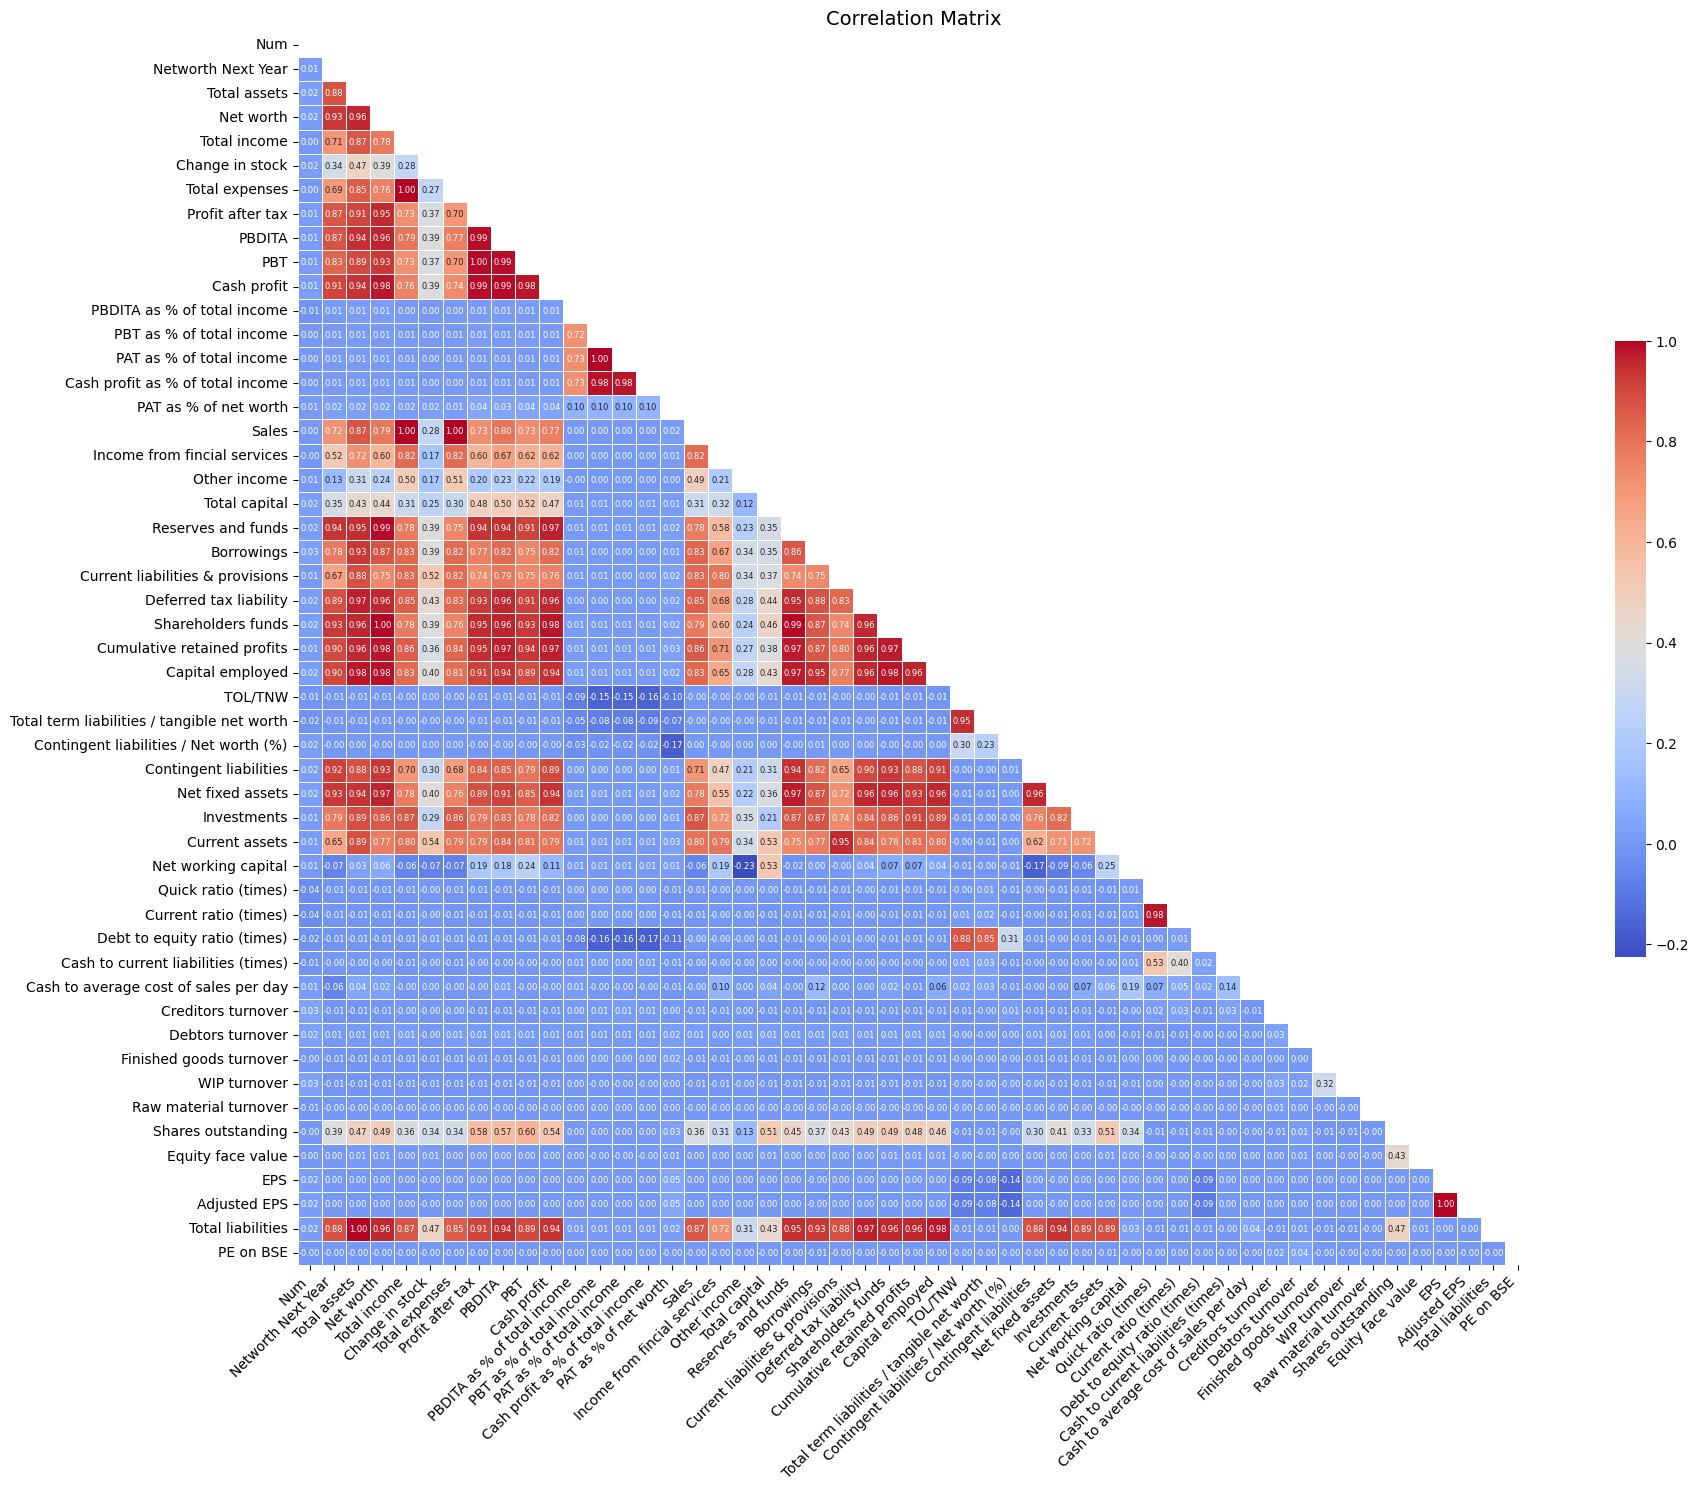

Pairs of variables with high correlation:
Networth Next Year - Total assets: 0.8778028814466854
Networth Next Year - Net worth: 0.9301348253492808
Networth Next Year - Total income: 0.7107786411998145
Networth Next Year - Profit after tax: 0.8678703637004082
Networth Next Year - PBDITA: 0.8722722732474264
Networth Next Year - PBT: 0.8336803675526337
Networth Next Year - Cash profit: 0.9064824019767795
Networth Next Year - Sales: 0.7160391488084142
Networth Next Year - Reserves and funds: 0.9384674849069115
Networth Next Year - Borrowings: 0.7825522817197432
Networth Next Year - Deferred tax liability: 0.889141631078624
Networth Next Year - Shareholders funds: 0.9299031941124895
Networth Next Year - Cumulative retained profits: 0.8974912455482026
Networth Next Year - Capital employed: 0.9012139145129601
Networth Next Year - Contingent liabilities: 0.9173424727963707
Networth Next Year - Net fixed assets: 0.9294045582718462
Networth Next Year - Investments: 0.7854306385733983
Networth Ne

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Replace this with actual data loading method

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure with larger size
plt.figure(figsize=(22, 16))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True, linewidths=0.5,
            annot_kws={"size": 6}, fmt=".2f", cbar_kws={"shrink": .5})

# Rotate the x and y axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add title to the heatmap
plt.title('Correlation Matrix', fontsize=14)

# Show the plot
plt.show()

# Identify pairs of variables with high correlation (absolute value > 0.7)
threshold = 0.7
high_correlations = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)

# Print pairs of variables with high correlation
print("Pairs of variables with high correlation:")
for col in high_correlations.columns:
    correlated_cols = high_correlations.index[high_correlations[col]]
    for correlated_col in correlated_cols:
        if col != correlated_col:
            print(f"{col} - {correlated_col}: {correlation_matrix.loc[col, correlated_col]}")


In [ ]:
df_cleaned.corr()

Num  Networth Next Year  \
Num                                          1.000000            0.010444   
Networth Next Year                           0.010444            1.000000   
Total assets                                 0.019068            0.877803   
Net worth                                    0.018239            0.930135   
Total income                                 0.002906            0.710779   
Change in stock                              0.018433            0.343903   
Total expenses                               0.002544            0.690423   
Profit after tax                             0.010680            0.867870   
PBDITA                                       0.012187            0.872272   
PBT                                          0.009808            0.833680   
Cash profit                                  0.014206            0.906482   
PBDITA as % of total income                 -0.013953            0.007172   
PBT as % of total income                     0.003221            0.006384   
PAT as % of total income                     0.003288            0.005965   
Cash profit as % of total income             0.003371            0.006329   
PAT as % of net worth                        0.007141            0.021671   
Sales                                        0.002667            0.716039   
Income from fincial services                -0.004254            0.519801   
Other income                                 0.008598            0.131445   
Total capital                                0.020867            0.349067   
Reserves and funds                           0.016764            0.938467   
Borrowings                                   0.026027            0.782552   
Current liabilities & provisions             0.008165            0.666903   
Deferred tax liability                       0.015105            0.889142   
Shareholders funds                           0.018792            0.929903   
Cumulative retained profits                  0.010757            0.897491   
Capital employed                             0.022441            0.901214   
TOL/TNW                                     -0.011776           -0.010461   
Total term liabilities / tangible net worth -0.019794           -0.006422   
Contingent liabilities / Net worth (%)       0.015006           -0.001563   
Contingent liabilities                       0.021680            0.917342   
Net fixed assets                             0.020779            0.929405   
Investments                                  0.011768            0.785431   
Current assets                               0.012525            0.654537   
Net working capital                          0.005400           -0.065877   
Quick ratio (times)                         -0.037128           -0.006067   
Current ratio (times)                       -0.036034           -0.005919   
Debt to equity ratio (times)                -0.018139           -0.011834   
Cash to current liabilities (times)         -0.012954           -0.002497   
Cash to average cost of sales per day        0.013219           -0.058824   
Creditors turnover                           0.034393           -0.007438   
Debtors turnover                             0.024850            0.005428   
Finished goods turnover                     -0.001450           -0.006154   
WIP turnover                                 0.026504           -0.006550   
Raw material turnover                       -0.009060           -0.001817   
Shares outstanding                          -0.003057            0.385531   
Equity face value                            0.003499            0.004113   
EPS                                          0.019776            0.003431   
Adjusted EPS                                 0.019783            0.003344   
Total liabilities                            0.019068            0.877803   
PE on BSE                                   -0.000635           -0.003385   

                                             

## **Univariate and bivariate analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

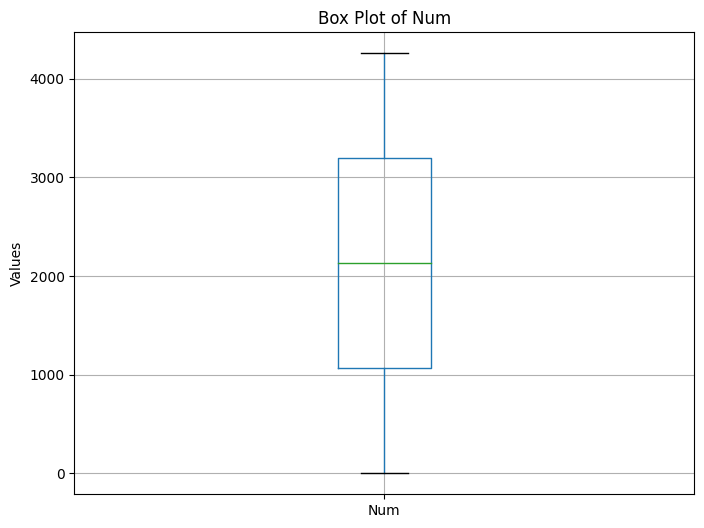

In [ ]:
# Box plot of the column
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
df_cleaned.boxplot(column=['Num'])
plt.title('Box Plot of Num')  # Optional: Add plot title
plt.ylabel('Values')  # Optional: Add label to y-axis
plt.show()

The box plot of all the columns have been made in above step of handling outliers

In [ ]:
from scipy import stats

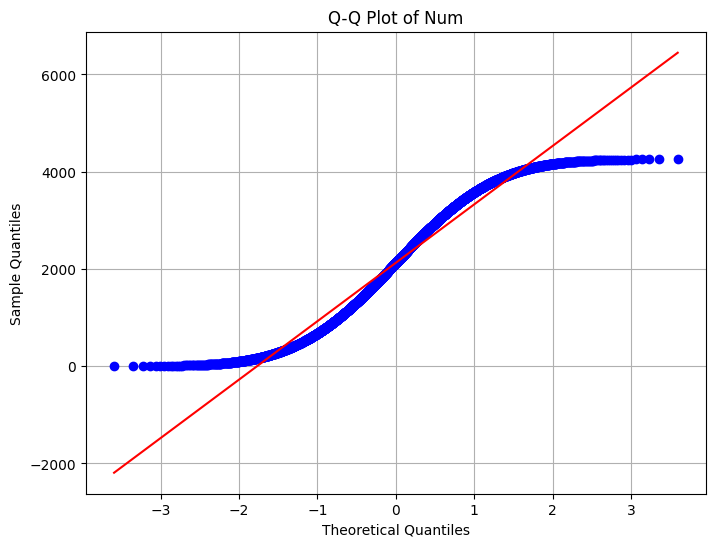

In [ ]:
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
stats.probplot(df['Num'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Num')  # Optional: Add plot title
plt.xlabel('Theoretical Quantiles')  # Optional: Add label to x-axis
plt.ylabel('Sample Quantiles')  # Optional: Add label to y-axis
plt.grid(True)  # Optional: Add gridlines
plt.show()

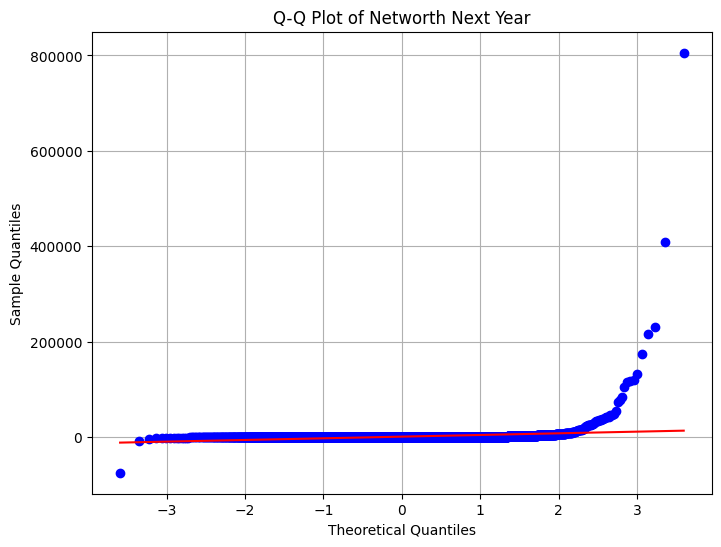

In [ ]:
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
stats.probplot(df['Networth Next Year'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Networth Next Year')  # Optional: Add plot title
plt.xlabel('Theoretical Quantiles')  # Optional: Add label to x-axis
plt.ylabel('Sample Quantiles')  # Optional: Add label to y-axis
plt.grid(True)  # Optional: Add gridlines
plt.show()

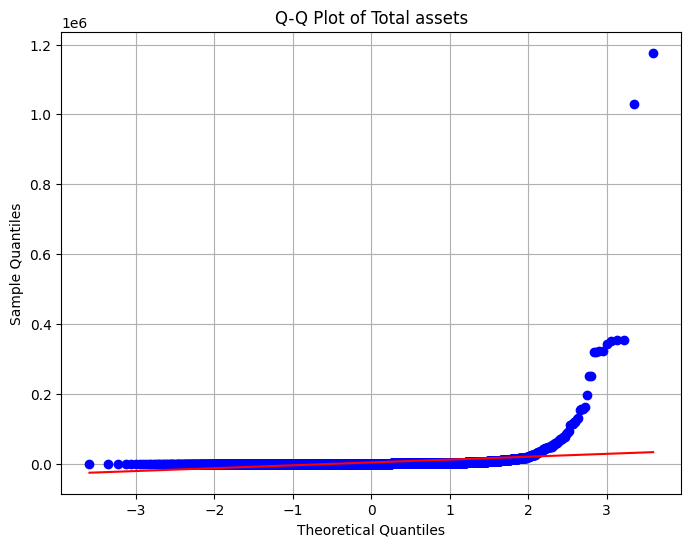

In [ ]:
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
stats.probplot(df['Total assets'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Total assets')  # Optional: Add plot title
plt.xlabel('Theoretical Quantiles')  # Optional: Add label to x-axis
plt.ylabel('Sample Quantiles')  # Optional: Add label to y-axis
plt.grid(True)  # Optional: Add gridlines
plt.show()

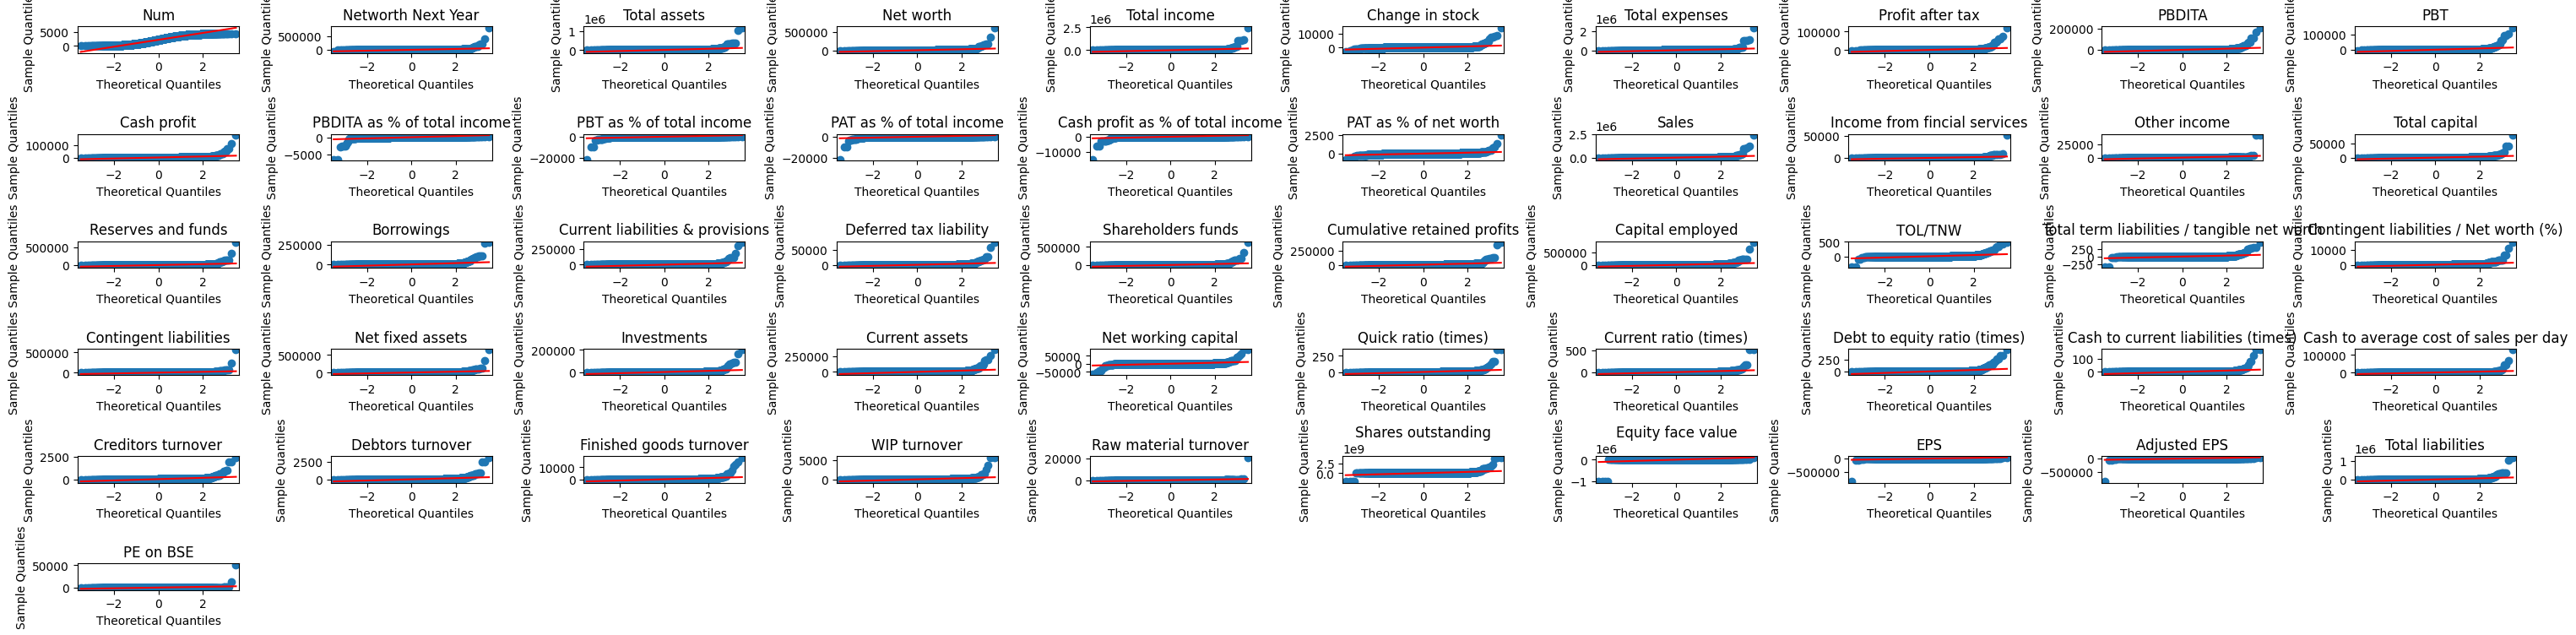

In [ ]:
## Q-Q plots
from statsmodels.api import qqplot
plt.figure(figsize=(30, 25))
for i, col in enumerate(df_cleaned.columns):
    plt.subplot(20, 10, i+1)
    qqplot(df_cleaned[col], line='s',ax=plt.gca())
    plt.title(col)
plt.tight_layout();

**Bivariate analysis**

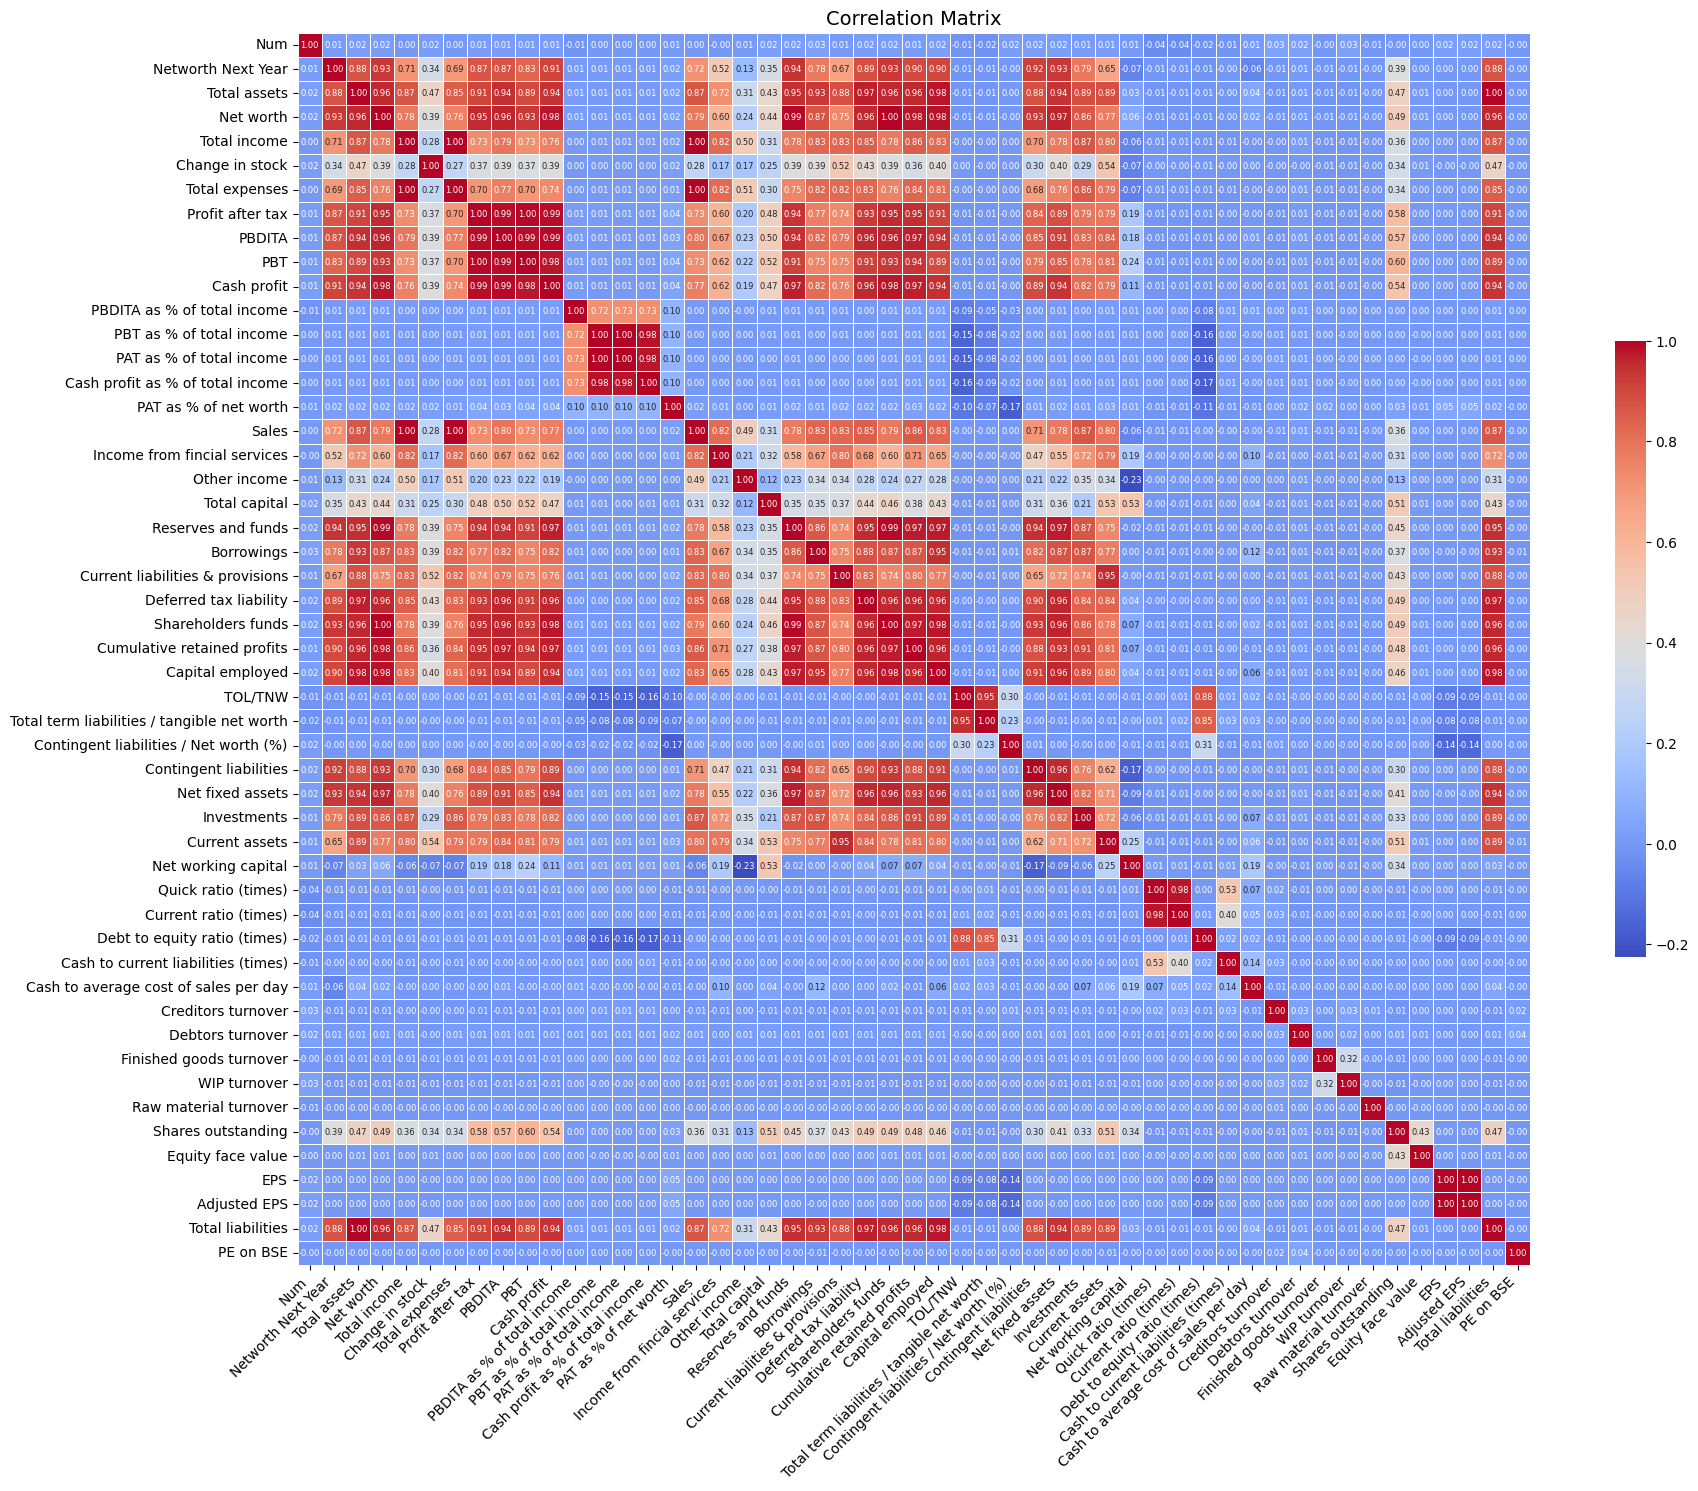

Pairs of variables with high correlation:
Networth Next Year - Total assets: 0.8778028814466854
Networth Next Year - Net worth: 0.9301348253492808
Networth Next Year - Total income: 0.7107786411998145
Networth Next Year - Profit after tax: 0.8678703637004082
Networth Next Year - PBDITA: 0.8722722732474264
Networth Next Year - PBT: 0.8336803675526337
Networth Next Year - Cash profit: 0.9064824019767795
Networth Next Year - Sales: 0.7160391488084142
Networth Next Year - Reserves and funds: 0.9384674849069115
Networth Next Year - Borrowings: 0.7825522817197432
Networth Next Year - Deferred tax liability: 0.889141631078624
Networth Next Year - Shareholders funds: 0.9299031941124895
Networth Next Year - Cumulative retained profits: 0.8974912455482026
Networth Next Year - Capital employed: 0.9012139145129601
Networth Next Year - Contingent liabilities: 0.9173424727963707
Networth Next Year - Net fixed assets: 0.9294045582718462
Networth Next Year - Investments: 0.7854306385733983
Networth Ne

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Set up the matplotlib figure with larger size
plt.figure(figsize=(22, 16))

# Draw the heatmap without the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5,
            annot_kws={"size": 6}, fmt=".2f", cbar_kws={"shrink": .5})

# Rotate the x and y axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add title to the heatmap
plt.title('Correlation Matrix', fontsize=14)

# Show the plot
plt.show()

# Identify pairs of variables with high correlation (absolute value > 0.7)
threshold = 0.7
high_correlations = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)

# Print pairs of variables with high correlation
print("Pairs of variables with high correlation:")
for col in high_correlations.columns:
    correlated_cols = high_correlations.index[high_correlations[col]]
    for correlated_col in correlated_cols:
        if col != correlated_col:
            print(f"{col} - {correlated_col}: {correlation_matrix.loc[col, correlated_col]}")

In [ ]:
df_cleaned.corr()

Num  Networth Next Year  \
Num                                          1.000000            0.010444   
Networth Next Year                           0.010444            1.000000   
Total assets                                 0.019068            0.877803   
Net worth                                    0.018239            0.930135   
Total income                                 0.002906            0.710779   
Change in stock                              0.018433            0.343903   
Total expenses                               0.002544            0.690423   
Profit after tax                             0.010680            0.867870   
PBDITA                                       0.012187            0.872272   
PBT                                          0.009808            0.833680   
Cash profit                                  0.014206            0.906482   
PBDITA as % of total income                 -0.013953            0.007172   
PBT as % of total income                     0.003221            0.006384   
PAT as % of total income                     0.003288            0.005965   
Cash profit as % of total income             0.003371            0.006329   
PAT as % of net worth                        0.007141            0.021671   
Sales                                        0.002667            0.716039   
Income from fincial services                -0.004254            0.519801   
Other income                                 0.008598            0.131445   
Total capital                                0.020867            0.349067   
Reserves and funds                           0.016764            0.938467   
Borrowings                                   0.026027            0.782552   
Current liabilities & provisions             0.008165            0.666903   
Deferred tax liability                       0.015105            0.889142   
Shareholders funds                           0.018792            0.929903   
Cumulative retained profits                  0.010757            0.897491   
Capital employed                             0.022441            0.901214   
TOL/TNW                                     -0.011776           -0.010461   
Total term liabilities / tangible net worth -0.019794           -0.006422   
Contingent liabilities / Net worth (%)       0.015006           -0.001563   
Contingent liabilities                       0.021680            0.917342   
Net fixed assets                             0.020779            0.929405   
Investments                                  0.011768            0.785431   
Current assets                               0.012525            0.654537   
Net working capital                          0.005400           -0.065877   
Quick ratio (times)                         -0.037128           -0.006067   
Current ratio (times)                       -0.036034           -0.005919   
Debt to equity ratio (times)                -0.018139           -0.011834   
Cash to current liabilities (times)         -0.012954           -0.002497   
Cash to average cost of sales per day        0.013219           -0.058824   
Creditors turnover                           0.034393           -0.007438   
Debtors turnover                             0.024850            0.005428   
Finished goods turnover                     -0.001450           -0.006154   
WIP turnover                                 0.026504           -0.006550   
Raw material turnover                       -0.009060           -0.001817   
Shares outstanding                          -0.003057            0.385531   
Equity face value                            0.003499            0.004113   
EPS                                          0.019776            0.003431   
Adjusted EPS                                 0.019783            0.003344   
Total liabilities                            0.019068            0.877803   
PE on BSE                                   -0.000635           -0.003385   

                                             

In [ ]:
df_cleaned

Num  Networth Next Year  Total assets  Net worth  Total income  \
0        1               395.3         827.6      336.5    534.100000   
1        2                36.2          67.7       24.3    137.900000   
2        3                84.0         238.4       78.9    331.200000   
3        4              2041.4        6883.5     1443.3   8448.500000   
4        5                41.8          90.9       47.0    388.600000   
...    ...                 ...           ...        ...           ...   
4251  4252                 0.2           0.4        0.2   4688.189789   
4252  4253                93.3         159.6       86.7    172.900000   
4253  4254               932.2         833.8      664.6   2314.700000   
4254  4255                64.6          95.0       48.5    110.500000   
4255  4256                 0.0         384.6      111.3    345.800000   

      Change in stock  Total expenses  Profit after tax      PBDITA  \
0           13.500000        508.7000         38.900000  124.400000   
1           -3.700000        131.0000          3.200000    5.500000   
2          -18.100000        309.2000          3.900000   25.800000   
3          212.200000       8482.4000        178.300000  418.400000   
4            3.400000        392.7000         -0.700000    7.200000   
...               ...             ...               ...         ...   
4251        43.702482       4356.3011        295.050585  605.940639   
4252         0.100000        169.7000          3.300000   18.400000   
4253        32.100000       2151.6000        195.200000  348.400000   
4254         4.600000        113.5000          1.600000    9.700000   
4255        11.300000        341.7000         15.400000   57.600000   

             PBT  ...  Debtors turnover  Finished goods turnover  \
0      64.600000  ...          5.650000                 3.990000   
1       1.000000  ...         17.929029                84.369988   
2      10.500000  ...          2.510000                17.670000   
3     185.100000  ...          1.910000                18.140000   
4      -0.600000  ...         68.000000                45.870000   
...          ...  ...               ...                      ...   
4251  410.259044  ...          0.000000                84.369988   
4252    3.700000  ...          1.800000                11.000000   
4253  303.000000  ...          6.080000                59.280000   
4254    2.600000  ...          3.710000                78.990000   
4255   20.700000  ...          4.710000                53.370000   

      WIP turnover  Raw material turnover  Shares outstanding  \
0         3.370000              14.870000        8.760056e+06   
1        28.684513              17.733926        2.376491e+07   
2         8.760000               8.350000        2.376491e+07   
3        18.620000              11.110000        1.000000e+07   
4        28.670000              19.930000        1.073150e+05   
...            ...                    ...                 ...   
4251     28.684513               0.000000        2.376491e+07   
4252      8.280000               9.880000        8.162700e+06   
4253     31.140000               9.870000        7.479762e+06   
4254     11.510000              14.950000        2.376491e+07   
4255      8.330000               3.740000        9.600000e+05   

      Equity face value    EPS  Adjusted EPS  Total liabilities  PE on BSE  
0             10.000000   4.44          4.44              827.6   55.46229  
1          -1094.828671   0.00          0.00               67.7   55.46229  
2          -1094.828671   0.00          0.00              238.4   55.46229  
3             10.000000  17.60         17.60             6883.5   55.46229  
4            100.000000  -6.52         -6.52               90.9   55.46229  
...                 ...    ...           ...                ...        ...  
4251       -1094.828671   0.00          0.00                0.4   55.46229  
4252          10.000000   0.42          0.42              159.6

## **Split the data into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
# Create the dependent variable 'default'
df_cleaned['default'] = np.where(df_cleaned['Networth Next Year'] < 0, 1, 0)

# Define features and target variable
X = df_cleaned.drop(columns=['Num', 'Networth Next Year', 'default'])
y = df_cleaned['default']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_test)

# Calculate performance measures
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9350039154267815
Confusion Matrix:
[[1188   19]
 [  64    6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1207
           1       0.24      0.09      0.13        70

    accuracy                           0.94      1277
   macro avg       0.59      0.53      0.55      1277
weighted avg       0.91      0.94      0.92      1277



In [ ]:
X_train

Total assets  Net worth  Total income  Change in stock  Total expenses  \
6            329.9       92.5     17.300000         0.100000         16.0000   
4134        6505.0     4066.0   6976.900000        48.900000       6249.5000   
3029         977.4      266.1    666.300000      -150.700000        561.0000   
1962         256.3       94.1    242.500000        -0.800000        236.3000   
2797          63.3        8.8    207.700000        -0.100000        204.7000   
...            ...        ...           ...              ...             ...   
2369         241.7       92.5     71.500000        43.702482         67.7000   
2422         819.5      273.7   1048.400000       -18.100000        982.2000   
1949         348.6      154.3    270.100000         7.200000        278.4000   
2429          50.2        9.0     32.600000         2.000000         46.6000   
2118         143.6       46.8   4688.189789        43.702482       4356.3011   

      Profit after tax       PBDITA          PBT  Cash profit  \
6             1.400000    14.000000     6.400000     6.800000   
4134        776.300000  1171.300000  1061.100000   842.900000   
3029        -45.400000    26.300000   -66.300000   -25.000000   
1962          5.400000    14.900000     6.300000    10.700000   
2797          2.900000     7.300000     4.900000     4.400000   
...                ...          ...          ...          ...   
2369          3.800000    26.000000     9.200000    14.600000   
2422         48.100000   129.100000    77.400000    70.300000   
1949         -1.100000    22.500000    -0.900000     7.100000   
2429        -12.000000    -9.800000   -11.900000   -10.300000   
2118        295.050585   605.940639   410.259044   408.267479   

      PBDITA as % of total income  ...  Debtors turnover  \
6                           80.92  ...              3.49   
4134                        16.79  ...              4.51   
3029                         3.95  ...              7.46   
1962                         6.14  ...              3.87   
2797                         3.51  ...              5.73   
...                           ...  ...               ...   
2369                        36.36  ...              2.42   
2422                        12.31  ...              4.06   
1949                         8.33  ...             14.31   
2429                       -30.06  ...              8.34   
2118                         0.00  ...              0.00   

      Finished goods turnover  WIP turnover  Raw material turnover  \
6                   15.980000     12.910000                   0.00   
4134               116.550000     46.970000                  14.52   
3029                 3.130000      2.290000                   8.20   
1962                 6.190000      5.240000                   2.58   
2797               407.440000     38.290000                   0.00   
...                       ...           ...                    ...   
2369                 3.010000      2.430000                   1.26   
2422                45.090000     10.570000                   3.71   
1949                 6.180000      6.820000                   1.57   
2429                34.090000     23.190000                   1.16   
2118                84.369988     28.684513                   0.00   

      Shares outstanding  Equity face value     EPS  Adjusted EPS  \
6           2.500000e+05         100.000000  -12.40        -12.40   
4134        7.500000e+06          10.000000  102.44        102.44   
3029        3.575200e+07          10.000000   -1.27         -1.27   
1962        3.005030e+06          10.000000    1.80          1.80   
2797        2.376491e+07       -1094.828671    0.00          0.00   
...                  ...                ...     ...           ...   
2369        9.988883e+06          10.000000   -0.12         -0.12   
2422        5.000000e+06          10.000000   10.12         10.12   
1949        2.376491e+07       -1094.828671    0.00          0.00   
2429        

In [ ]:
y_train

6       0
4134    0
3029    0
1962    0
2797    0
       ..
2369    0
2422    0
1949    0
2429    0
2118    0
Name: default, Length: 2979, dtype: int64

In [ ]:
X_test

Total assets  Net worth  Total income  Change in stock  Total expenses  \
3892        2048.7     1213.8   3847.600000        14.800000          3699.0   
682          494.9      203.7    447.700000         4.200000           435.9   
1197          18.0       10.5   4688.189789        43.702482             0.1   
96          6833.5     2609.1   6398.200000         5.200000          5688.1   
3971        4701.0      846.8   2500.700000        37.700000          2452.8   
...            ...        ...           ...              ...             ...   
838          115.2      105.9     77.400000         0.100000            78.2   
99           154.7        8.4     29.800000        43.702482            38.2   
1405         494.4       57.3    484.800000         0.600000           458.7   
1843          68.3       12.0      0.700000        -4.800000            26.4   
2229          60.6        7.6    108.000000        -0.200000           105.8   

      Profit after tax  PBDITA     PBT  Cash profit  \
3892             163.4   410.8   262.5        273.1   
682               16.0    52.6    18.3         30.0   
1197              -0.1    -0.1    -0.1         -0.1   
96               715.3  1358.9  1215.1        825.2   
3971              85.6   535.5   146.2        228.7   
...                ...     ...     ...          ...   
838               -0.7     4.2     0.3          2.8   
99                -8.4    -7.0   -11.5         -7.2   
1405              26.7   109.5    43.4         76.4   
1843             -30.5   -10.1   -14.3        -10.7   
2229               2.0     7.0     2.0          3.0   

      PBDITA as % of total income  ...  Debtors turnover  \
3892                    10.680000  ...         12.540000   
682                     11.750000  ...          6.180000   
1197                     3.179892  ...         17.929029   
96                      21.240000  ...          4.530000   
3971                    21.410000  ...          9.690000   
...                           ...  ...               ...   
838                      5.430000  ...          2.790000   
99                     -23.490000  ...         10.460000   
1405                    22.590000  ...         14.970000   
1843                 -1442.860000  ...          0.030000   
2229                     6.480000  ...         13.350000   

      Finished goods turnover  WIP turnover  Raw material turnover  \
3892                44.480000     36.340000               6.780000   
682                 45.330000     27.550000              15.370000   
1197                84.369988     28.684513              17.733926   
96                  84.369988     68.830000               9.200000   
3971                20.710000     14.070000               2.470000   
...                       ...           ...                    ...   
838                452.870000    188.490000             156.000000   
99                  84.369988     28.684513               0.000000   
1405                48.150000     30.900000               2.480000   
1843                 4.210000      2.260000               0.190000   
2229               103.920000     18.530000               3.610000   

      Shares outstanding  Equity face value     EPS  Adjusted EPS  \
3892        2.787964e+07          10.000000    6.18          6.18   
682         1.872650e+06          10.000000    8.54          8.54   
1197        3.000000e+06          10.000000   -0.03         -0.03   
96          1.254209e+07          10.000000   56.49         56.49   
3971        2.948661e+07          10.000000    2.00          2.00   
...                  ...                ...     ...           ...   
838         6.895070e+06          10.000000   -0.10         -0.10   
99          2.376491e+07       -1094.828671    0.00          0.00   
1405        5.000000e+04         100.000000  532.00        532.00   
1843        4.920000e+06          10.000000   -1.42         -1.42   
2229        7.800000e+05          10.000000    2.56          2.

In [ ]:
y_test

3892    0
682     0
1197    0
96      0
3971    0
       ..
838     0
99      0
1405    0
1843    1
2229    0
Name: default, Length: 1277, dtype: int64

## **Build Logistic Regression model on most important variable** and
## **Predict the accurcay of model on train and test dataset**

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
# Create the dependent variable 'default'
df_cleaned['default'] = np.where(df_cleaned['Networth Next Year'] < 0, 1, 0)

# Define features and target variable
X = df_cleaned.drop(columns=['Num', 'Networth Next Year', 'default'])
y = df_cleaned['default']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Create a logistic regression model for feature selection
model = LogisticRegression(max_iter=1000)

# Use RFE to select the top 5 features
selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[selector.support_]

print("Selected Features:", selected_features)

# Train the logistic regression model using the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

model.fit(X_train_selected, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train_selected)

# Predict on the validation set
y_test_pred = model.predict(X_test_selected)

# Calculate performance measures for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred, zero_division=0)

print(f"Training Accuracy: {train_accuracy}")
print("Training Confusion Matrix:")
print(train_conf_matrix)
print("Training Classification Report:")
print(train_class_report)

# Calculate performance measures for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred, zero_division=0)

print(f"Test Accuracy: {test_accuracy}")
print("Test Confusion Matrix:")
print(test_conf_matrix)
print("Test Classification Report:")
print(test_class_report)

# Calculate ROC AUC score
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_selected)[:, 1])
print(f"Test ROC AUC Score: {test_roc_auc}")

# Sort the data in descending order based on the probability of default and then divide into 10 deciles
test_probabilities = model.predict_proba(X_test_selected)[:, 1]
test_results = pd.DataFrame({'default': y_test, 'predicted_prob': test_probabilities})
test_results = test_results.sort_values(by='predicted_prob', ascending=False)
test_results['decile'] = pd.qcut(test_results['predicted_prob'], 10, labels=False)

# Check how well the model has performed within each decile
decile_summary = test_results.groupby('decile').agg(
    count=('default', 'size'),
    default_count=('default', 'sum'),
    non_default_count=('default', lambda x: (x == 0).sum()),
    mean_predicted_prob=('predicted_prob', 'mean')
).reset_index()

print("Decile Summary:")
print(decile_summary)

Selected Features: Index(['Net worth', 'PAT as % of net worth', 'Shareholders funds',
       'Cumulative retained profits', 'Investments'],
      dtype='object')
Training Accuracy: 0.9503188989593824
Training Confusion Matrix:
[[2802   13]
 [ 135   29]]
Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2815
           1       0.69      0.18      0.28       164

    accuracy                           0.95      2979
   macro avg       0.82      0.59      0.63      2979
weighted avg       0.94      0.95      0.94      2979

Test Accuracy: 0.9490994518402506
Test Confusion Matrix:
[[1199    8]
 [  57   13]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1207
           1       0.62      0.19      0.29        70

    accuracy                           0.95      1277
   macro avg       0.79      0.59      0.63      1277
wei

## **Sort the data in descending order based on probability of default and then divide into 10  dociles based on probability and check how model has performed**

In [ ]:

# Create the dependent variable 'default'
df_cleaned['default'] = np.where(df_cleaned['Networth Next Year'] < 0, 1, 0)

# Define features and target variable
X = df_cleaned.drop(columns=['Num', 'Networth Next Year', 'default'])
y = df_cleaned['default']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Create a logistic regression model for feature selection
model = LogisticRegression(max_iter=2000)

# Use RFE to select the top 5 features (you can change the number of features as needed)
selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[selector.support_]

print("Selected Features:", selected_features)

# Train the logistic regression model using the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

model.fit(X_train_selected, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train_selected)

# Predict on the validation set
y_test_pred = model.predict(X_test_selected)

# Calculate performance measures for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred, zero_division=0)

print(f"Training Accuracy: {train_accuracy}")
print("Training Confusion Matrix:")
print(train_conf_matrix)
print("Training Classification Report:")
print(train_class_report)

# Calculate performance measures for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred, zero_division=0)

print(f"Test Accuracy: {test_accuracy}")
print("Test Confusion Matrix:")
print(test_conf_matrix)
print("Test Classification Report:")
print(test_class_report)

Selected Features: Index(['Net worth', 'PAT as % of net worth', 'Shareholders funds',
       'Cumulative retained profits', 'Investments'],
      dtype='object')
Training Accuracy: 0.9503188989593824
Training Confusion Matrix:
[[2802   13]
 [ 135   29]]
Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2815
           1       0.69      0.18      0.28       164

    accuracy                           0.95      2979
   macro avg       0.82      0.59      0.63      2979
weighted avg       0.94      0.95      0.94      2979

Test Accuracy: 0.9490994518402506
Test Confusion Matrix:
[[1199    8]
 [  57   13]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1207
           1       0.62      0.19      0.29        70

    accuracy                           0.95      1277
   macro avg       0.79      0.59      0.63      1277
wei

In [ ]:

# Create the dependent variable 'default'
df_cleaned['default'] = np.where(df_cleaned['Networth Next Year'] < 0, 1, 0)

# Define features and target variable
X = df_cleaned.drop(columns=['Num', 'Networth Next Year', 'default'])
y = df_cleaned['default']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Create a logistic regression model for feature selection
model = LogisticRegression(max_iter=1000)

# Use RFE to select the top 5 features (you can change the number of features as needed)
selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = np.array(X.columns)[selector.support_]

print("Selected Features:", selected_features)

# Train the logistic regression model using the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Update the logistic regression model with more iterations
model = LogisticRegression(max_iter=2000)
model.fit(X_train_selected, y_train)

# Predict probabilities on the test set
y_test_probs = model.predict_proba(X_test_selected)[:, 1]

# Create a DataFrame with true labels and predicted probabilities
test_results = pd.DataFrame({'default': y_test, 'predicted_prob': y_test_probs})

# Sort the DataFrame by predicted probabilities in descending order
test_results = test_results.sort_values(by='predicted_prob', ascending=False)

# Divide the DataFrame into 10 deciles
test_results['decile'] = pd.qcut(test_results['predicted_prob'], 10, labels=False)

# Calculate performance measures within each decile
decile_summary = test_results.groupby('decile').agg(
    count=('default', 'size'),
    default_count=('default', 'sum'),
    non_default_count=('default', lambda x: (x == 0).sum()),
    mean_predicted_prob=('predicted_prob', 'mean')
).reset_index()

# Calculate the cumulative sums for gains chart
decile_summary['cumulative_defaults'] = decile_summary['default_count'].cumsum()
decile_summary['cumulative_non_defaults'] = decile_summary['non_default_count'].cumsum()
decile_summary['cumulative_total'] = decile_summary['count'].cumsum()

# Calculate the cumulative percentages
total_defaults = decile_summary['default_count'].sum()
total_non_defaults = decile_summary['non_default_count'].sum()

decile_summary['cumulative_default_pct'] = decile_summary['cumulative_defaults'] / total_defaults
decile_summary['cumulative_non_default_pct'] = decile_summary['cumulative_non_defaults'] / total_non_defaults
decile_summary['cumulative_total_pct'] = decile_summary['cumulative_total'] / decile_summary['count'].sum()

print(decile_summary)

# Evaluate overall performance on the test set
test_accuracy = accuracy_score(y_test, model.predict(X_test_selected))
test_conf_matrix = confusion_matrix(y_test, model.predict(X_test_selected))
test_class_report = classification_report(y_test, model.predict(X_test_selected), zero_division=0)
test_roc_auc = roc_auc_score(y_test, y_test_probs)

print(f"Test Accuracy: {test_accuracy}")
print("Test Confusion Matrix:")
print(test_conf_matrix)
print("Test Classification Report:")
print(test_class_report)
print(f"Test ROC AUC Score: {test_roc_auc}")

Selected Features: ['Net worth' 'PAT as % of net worth' 'Shareholders funds'
 'Cumulative retained profits' 'Investments']
   decile  count  default_count  non_default_count  mean_predicted_prob  \
0       0    128              1                127             0.005894   
1       1    128              0                128             0.018297   
2       2    127              2                125             0.026503   
3       3    128              0                128             0.033009   
4       4    128              2                126             0.038201   
5       5    127              0                127             0.042970   
6       6    128              5                123             0.048010   
7       7    127              6                121             0.053606   
8       8    128             11                117             0.060994   
9       9    128             43                 85             0.269652   

   cumulative_defaults  cumulative_non_defaults  cu

##**Build Random Forest Model and predict the Model on train and test data**

In [ ]:
# Create a Random Forest classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model_rf.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model_rf.predict(X_train)

# Predict on the test set
y_test_pred = model_rf.predict(X_test)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Print classification report for the test set
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print confusion matrix for the test set
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.9916079221215173
Test Accuracy: 0.9451840250587314
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1207
           1       0.50      0.36      0.42        70

    accuracy                           0.95      1277
   macro avg       0.73      0.67      0.69      1277
weighted avg       0.94      0.95      0.94      1277

Confusion Matrix:
[[1182   25]
 [  45   25]]


## **Compare the performance of Logistic Regression and Random forest**

Performance Comparison: Logistic Regression vs Random Forest
Logistic Regression:
•	Accuracy:
o	Training Accuracy: 93.50%
o	Test Accuracy: 94.00%
•	Confusion Matrix (Test Set):
[[1188   19]
 [  64    6]]
o	Precision-Recall-F1 Scores (Test Set):
	Precision (class 1): 24%
	Recall (class 1): 9%
	F1-score (class 1): 13%
Random Forest:
•	Accuracy:
o	Training Accuracy: 99.16%
o	Test Accuracy: 94.52%
•	Confusion Matrix (Test Set):
[[1182   25]
 [  45   25]]
o	Precision-Recall-F1 Scores (Test Set):
	Precision (class 1): 50%
	Recall (class 1): 36%
	F1-score (class 1): 42%
Insights and Comparison:
1. Accuracy:
•	Both models achieve high accuracy on the test set, with Random Forest slightly outperforming Logistic Regression (94.52% vs 94.00%). However, the difference is marginal.
2. Precision and Recall:
•	Logistic Regression:
o	Higher precision (24%) compared to Random Forest (50%) for predicting defaults (1).
o	Lower recall (9%) compared to Random Forest (36%), indicating it misses more actual default cases.
•	Random Forest:
o	Lower precision (50%) but higher recall (36%) for predicting defaults (1). It identifies more true default cases but may also predict some false positives.
3. F1-score:
•	Logistic Regression:
o	Lower F1-score (13%) for defaults, reflecting the challenge of balancing precision and recall effectively.
•	Random Forest:
o	Higher F1-score (42%) for defaults, indicating better balance between precision and recall compared to Logistic Regression.
4. Business Implications:
•	Logistic Regression:
o	Preferred if minimizing false positives (incorrectly predicting defaults) is critical.
o	Useful in scenarios where precision is more important than recall.
•	Random Forest:
o	Recommended if capturing more true default cases (higher recall) is crucial, even if it means accepting some false positives.
o	Offers a more balanced approach in predicting defaults with a higher F1-score.
Conclusion:
•	Performance:
o	Random Forest generally offers better performance in capturing true defaults (1), as indicated by its higher recall and F1-score.
•	Model Selection:
o	Choose between Logistic Regression and Random Forest based on business priorities regarding precision, recall, and the trade-off between false positives and false negatives.
•	Further Optimization:
o	Consider optimizing either model through feature engineering, hyperparameter tuning, or ensemble techniques to potentially enhance performance metrics further.


